In [7]:
# Importamos las librerias necesarias
import pandas as pd
from datetime import datetime
from pycoingecko import CoinGeckoAPI
from matplotlib.dates import AutoDateLocator, DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [8]:
# Instanciamos el API
cg = CoinGeckoAPI()

In [9]:
# Obtenemos los datos de las criptomonedas
cg.get_coins_markets(vs_currency='usd')

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 29095,
  'market_cap': 566168033925,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 611000956489,
  'total_volume': 13492302345,
  'high_24h': 29405,
  'low_24h': 29053,
  'price_change_24h': -297.75018048287893,
  'price_change_percentage_24h': -1.013,
  'market_cap_change_24h': -5765623892.970825,
  'market_cap_change_percentage_24h': -1.00809,
  'circulating_supply': 19459100.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -57.85204,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 42816.07958,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-16T14:50:17.244Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ether

In [10]:
# Obtenemos las categorias
coinCategoriesData = cg.get_coins_categories()
filtered_categories = []
target_categories = ['Stablecoins', 'Smart Contract Platform', 'Decentralized Finance (DeFi)']
for category in coinCategoriesData:
    if category['name'] in target_categories:
        filtered_categories.append(category)

categorias_necesarias = filtered_categories
df_categorias_necesarias = pd.DataFrame(categorias_necesarias)
df_categorias_necesarias

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,smart-contract-platform,Smart Contract Platform,3.335205e+11,-2.545705,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,9.312078e+09,2023-08-16T14:50:06.339Z
1,stablecoins,Stablecoins,1.245323e+11,-0.297607,,[https://assets.coingecko.com/coins/images/325...,2.020072e+10,2023-08-16T14:50:06.038Z
2,decentralized-finance-defi,Decentralized Finance (DeFi),4.664622e+10,-4.135006,,[https://assets.coingecko.com/coins/images/134...,3.877266e+10,2023-08-16T14:50:10.545Z


In [11]:
# Obtenemos las criptomonedas por market cap rank
def get_top_coins_by_market_rank(vs_currency: str, num_coins: int):
    coin_markets = cg.get_coins_markets(vs_currency=vs_currency)
    sorted_coins = sorted(coin_markets, key=lambda coin: coin['market_cap_rank'])
    top_coins = sorted_coins[:num_coins]
    df = pd.DataFrame(top_coins, columns=['market_cap_rank', 'id', 'name', 'symbol'])
    return df

if __name__ == '__main__':
    vs_currency = 'usd'
    num_coins = 50
    top_coins_df = get_top_coins_by_market_rank(vs_currency, num_coins)

# top_coins_df.to_csv('top_coins_by_market_cap_rank.csv', index=False)
top_coins_df

,market_cap_rank,id,name,symbol
0,1,bitcoin,Bitcoin,btc
1,2,ethereum,Ethereum,eth
2,3,tether,Tether,usdt
3,4,binancecoin,BNB,bnb
4,5,ripple,XRP,xrp
5,6,usd-coin,USD Coin,usdc
6,7,staked-ether,Lido Staked Ether,steth
7,8,dogecoin,Dogecoin,doge
8,9,cardano,Cardano,ada
9,10,solana,Solana,sol


In [12]:
# Obtenemos las criptomonedas y sus movimientos en las ultimas 24h
crypto_list = ['ethereum', 'cardano', 'binancecoin', 'solana', 
    'tron', 'tether', 'usd-coin', 'dai', 'binance-usd', 'true-usd', 
    'staked-ether', 'uniswap', 'chainlink', 'lido-dao', 'maker']
coins_market = cg.get_coins_markets(vs_currency='usd')
df_market = pd.DataFrame(coins_market, columns=['id', 'current_price', 'high_24h', 'low_24h'])
filtered_data_24h = df_market[df_market['id'].isin(crypto_list)]

# filtered_data_24h.to_csv('filtered_data_24h.csv', index=False)
filtered_data_24h

,id,current_price,high_24h,low_24h
1,ethereum,1822.480000,1841.650000,1818.530000
2,tether,0.998454,1.001000,0.997200
3,binancecoin,233.160000,239.190000,232.730000
5,usd-coin,0.999882,1.001000,0.998243
6,staked-ether,1821.000000,1841.500000,1817.060000
8,cardano,0.274066,0.289105,0.271891
9,solana,23.140000,24.920000,22.990000
10,tron,0.075702,0.077213,0.075568
17,uniswap,5.690000,6.260000,5.660000
20,dai,1.000000,1.002000,0.998385


In [13]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [14]:
def cambiar_fecha(fecha):
    for row in fecha:
        unix_timestamp = row[0] / 1000  # Convertir a segundos
        formatted_date = datetime.fromtimestamp(unix_timestamp).strftime('%Y-%m-%d %H:%M')
        row[0] = formatted_date
    return fecha

<h1>Criptomonedas</h1>

Se extraen las criptomonedas por categorias con datos de 'Market-cap', 'Price', y 'Total Volumes'

<h2>Plataformas de Contrato Inteligente</h2>

            date      prices         market_caps     total_volumes        id  \
0     2015-08-07    2.831620            0.000000      90622.000000  ethereum   
1     2015-08-08    1.330750     80339475.000000     368070.000000  ethereum   
2     2015-08-10    0.687586     41556309.211122     400464.074544  ethereum   
3     2015-08-11    1.067379     64539006.306272    1518998.205337  ethereum   
4     2015-08-12    1.256613     76013261.054154    2073893.345031  ethereum   
...          ...         ...                 ...               ...       ...   
2927  2023-08-13 1848.505239 222069758272.727417 2215986526.701653  ethereum   
2928  2023-08-14 1839.512810 220948326523.333557 3642424563.740612  ethereum   
2929  2023-08-15 1843.513391 221564238004.308777 4495324729.871393  ethereum   
2930  2023-08-16 1826.913128 219472776850.511780 4416612452.114058  ethereum   
2931  2023-08-16 1823.182113 218989555752.517181 4845723846.567491  ethereum   

     symbol  
0       eth  
1       eth

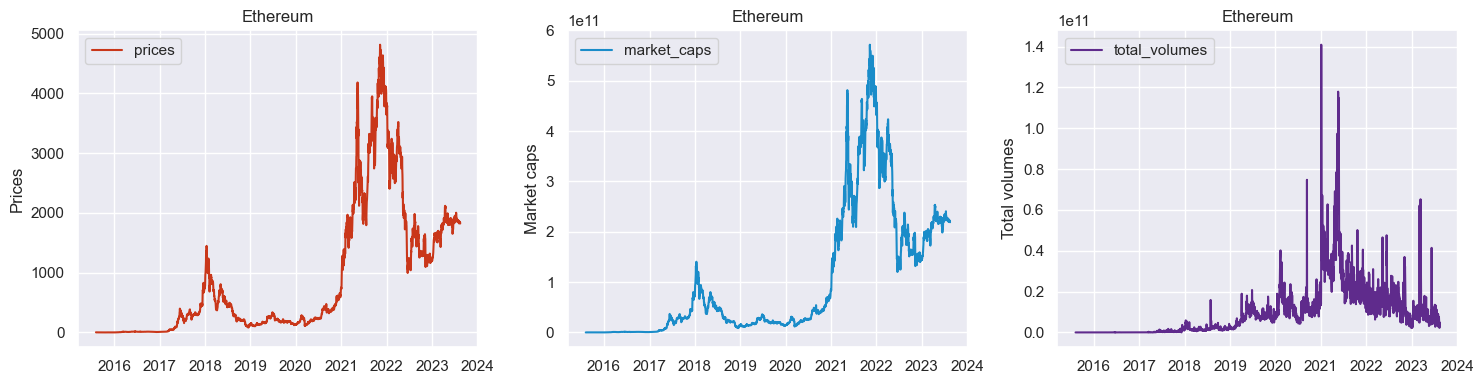

In [15]:
# Smart Contract Platform Coin
df_ethereum = cg.get_coin_market_chart_by_id(id='ethereum',vs_currency='usd',days='max')
df_ethereum['prices'] = cambiar_fecha(df_ethereum['prices'])
df_ethereum['market_caps'] = cambiar_fecha(df_ethereum['market_caps'])
df_ethereum['total_volumes'] = cambiar_fecha(df_ethereum['total_volumes'])
dates = [item[0] for item in df_ethereum['prices']]
prices = [item[1] for item in df_ethereum['prices']]
market_caps = [item[1] for item in df_ethereum['market_caps']]
total_volumes = [item[1] for item in df_ethereum['total_volumes']]
df_ethereum = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_ethereum['date'] = pd.to_datetime(df_ethereum['date'])
df_ethereum['date'] = df_ethereum['date'].dt.date
df_ethereum['id'] = 'ethereum'
df_ethereum['symbol'] = 'eth'
# df_ethereum.to_csv('ethereum_market_caps_vol.csv', index=False)
print(df_ethereum)


print(df_ethereum.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_ethereum.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Ethereum')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

Realizamos unas pequeñas modificaciones al DataFrame

In [16]:
rows_with_nulls = df_ethereum[df_ethereum.isnull().any(axis=1)]
rows_with_nulls

,date,prices,market_caps,total_volumes,id,symbol
603,2017-04-02,48.378467,NaN,86493796.356034,ethereum,eth


In [17]:
rows = df_ethereum.iloc[602:605]
rows

,date,prices,market_caps,total_volumes,id,symbol
602,2017-04-01,50.425788,4554446900.250353,57319943.037191,ethereum,eth
603,2017-04-02,48.378467,NaN,86493796.356034,ethereum,eth
604,2017-04-03,43.579240,3938736158.330706,107658222.897448,ethereum,eth


In [18]:
df_ethereum['market_caps'].interpolate(method='index', inplace=True)
# df_ethereum.to_csv('ethereum_market_caps_vol.csv', index=False)

In [19]:
rows = df_ethereum.iloc[602:605]
rows

,date,prices,market_caps,total_volumes,id,symbol
602,2017-04-01,50.425788,4554446900.250353,57319943.037191,ethereum,eth
603,2017-04-02,48.378467,4246591529.290529,86493796.356034,ethereum,eth
604,2017-04-03,43.579240,3938736158.330706,107658222.897448,ethereum,eth


            date   prices        market_caps    total_volumes       id symbol
0     2017-10-18 0.026845   696021404.307960   2351678.122306  cardano    ada
1     2017-10-19 0.026830   695622018.255994   2815155.969600  cardano    ada
2     2017-10-20 0.030300   785580027.642410   8883473.082063  cardano    ada
3     2017-10-21 0.028588   741202123.879770   5308856.917096  cardano    ada
4     2017-10-22 0.027796   720669848.472413   2901876.122086  cardano    ada
...          ...      ...                ...              ...      ...    ...
2125  2023-08-13 0.291666 10217585439.953056 105607968.604844  cardano    ada
2126  2023-08-14 0.289372 10135047904.827347 125106297.155349  cardano    ada
2127  2023-08-15 0.290452 10181963472.170074 129874470.395376  cardano    ada
2128  2023-08-16 0.281729  9874705133.518471 174122704.034539  cardano    ada
2129  2023-08-16 0.281741  9879384212.952820 185451956.591442  cardano    ada

[2130 rows x 6 columns]
date             0
prices           0
m

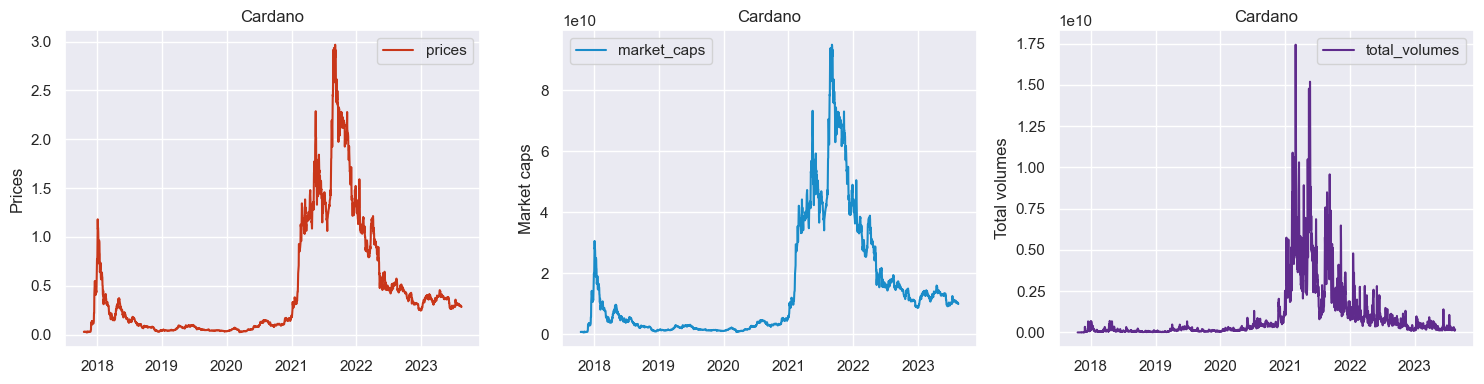

In [20]:
# Smart Contract Platform Coin
df_cardano = cg.get_coin_market_chart_by_id(id='cardano',vs_currency='usd',days='max')
df_cardano['prices'] = cambiar_fecha(df_cardano['prices'])
df_cardano['market_caps'] = cambiar_fecha(df_cardano['market_caps'])
df_cardano['total_volumes'] = cambiar_fecha(df_cardano['total_volumes'])
dates = [item[0] for item in df_cardano['prices']]
prices = [item[1] for item in df_cardano['prices']]
market_caps = [item[1] for item in df_cardano['market_caps']]
total_volumes = [item[1] for item in df_cardano['total_volumes']]
df_cardano = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_cardano['date'] = pd.to_datetime(df_cardano['date'])
df_cardano['date'] = df_cardano['date'].dt.date
df_cardano['id'] = 'cardano'
df_cardano['symbol'] = 'ada'
# df_cardano.to_csv('cardano_market_caps_vol.csv', index=False)
print(df_cardano)


print(df_cardano.isnull().sum())



nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_cardano.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Cardano')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date     prices        market_caps    total_volumes           id  \
0     2017-09-16   0.107251    10725062.436515         1.051223  binancecoin   
1     2017-09-17   0.154041    15404129.090981        14.678587  binancecoin   
2     2017-09-18   0.173491    17349123.907272         6.001767  binancecoin   
3     2017-09-19   0.168334    16833419.058268         3.878927  binancecoin   
4     2017-09-20   0.166628    16662792.485644        40.687619  binancecoin   
...          ...        ...                ...              ...          ...   
2155  2023-08-13 240.088445 36943552949.563797 195205362.183886  binancecoin   
2156  2023-08-14 240.030792 36913820931.580208 230763796.034427  binancecoin   
2157  2023-08-15 240.358056 36970232010.680595 323212804.632478  binancecoin   
2158  2023-08-16 236.607285 36440851751.899788 480198153.756926  binancecoin   
2159  2023-08-16 236.693514 36403954598.584595 482831312.805690  binancecoin   

     symbol  
0       bnb  
1       bnb

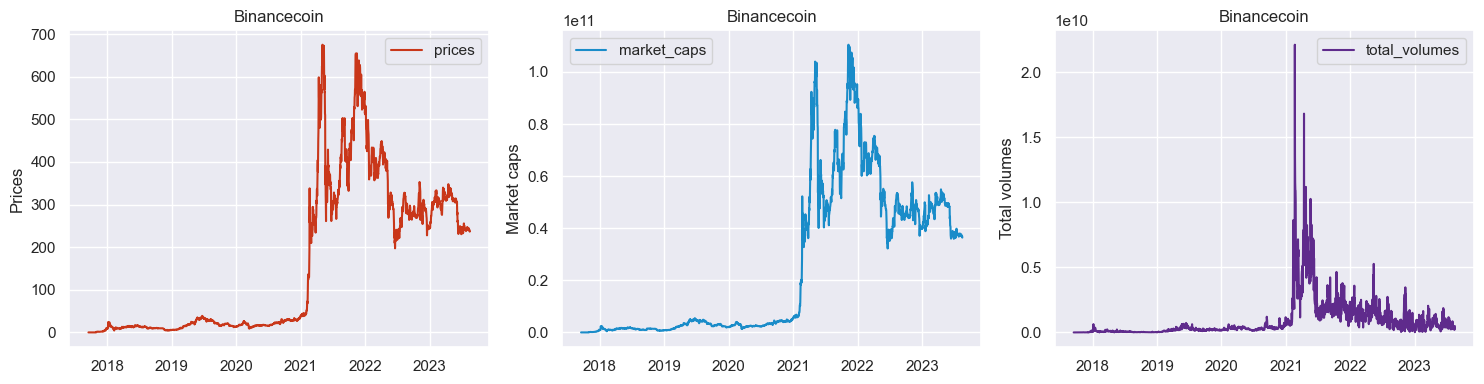

In [21]:
# Smart Contract Platform Coin
df_binancecoin = cg.get_coin_market_chart_by_id(id='binancecoin',vs_currency='usd',days='max')
df_binancecoin['prices'] = cambiar_fecha(df_binancecoin['prices'])
df_binancecoin['market_caps'] = cambiar_fecha(df_binancecoin['market_caps'])
df_binancecoin['total_volumes'] = cambiar_fecha(df_binancecoin['total_volumes'])
dates = [item[0] for item in df_binancecoin['prices']]
prices = [item[1] for item in df_binancecoin['prices']]
market_caps = [item[1] for item in df_binancecoin['market_caps']]
total_volumes = [item[1] for item in df_binancecoin['total_volumes']]
df_binancecoin = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_binancecoin['date'] = pd.to_datetime(df_binancecoin['date'])
df_binancecoin['date'] = df_binancecoin['date'].dt.date
df_binancecoin['id'] = 'binancecoin'
df_binancecoin['symbol'] = 'bnb'
# df_binancecoin.to_csv('binancecoin_market_caps_vol.csv', index=False)
print(df_binancecoin)


print(df_binancecoin.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_binancecoin.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Binancecoin')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date    prices        market_caps    total_volumes      id symbol
0     2020-04-11  0.957606     7827651.892659  92672667.434470  solana    sol
1     2020-04-12  0.784711     6173607.678345  49458692.875224  solana    sol
2     2020-04-13  0.875994     7269680.447445  37821009.955602  solana    sol
3     2020-04-14  0.786712     6302364.150585  19579214.892932  solana    sol
4     2020-04-15  0.666673     5306221.065759  17523533.049867  solana    sol
...          ...       ...                ...              ...     ...    ...
1219  2023-08-13 24.891819 10095650763.649355 277306903.122498  solana    sol
1220  2023-08-14 24.223294  9839554742.689486 278182091.444864  solana    sol
1221  2023-08-15 25.147725 10211324982.836502 388025853.451112  solana    sol
1222  2023-08-16 23.875641  9697572470.820595 452521516.469082  solana    sol
1223  2023-08-16 23.380576  9499351524.954086 482439957.066886  solana    sol

[1224 rows x 6 columns]
date             0
prices           0
m

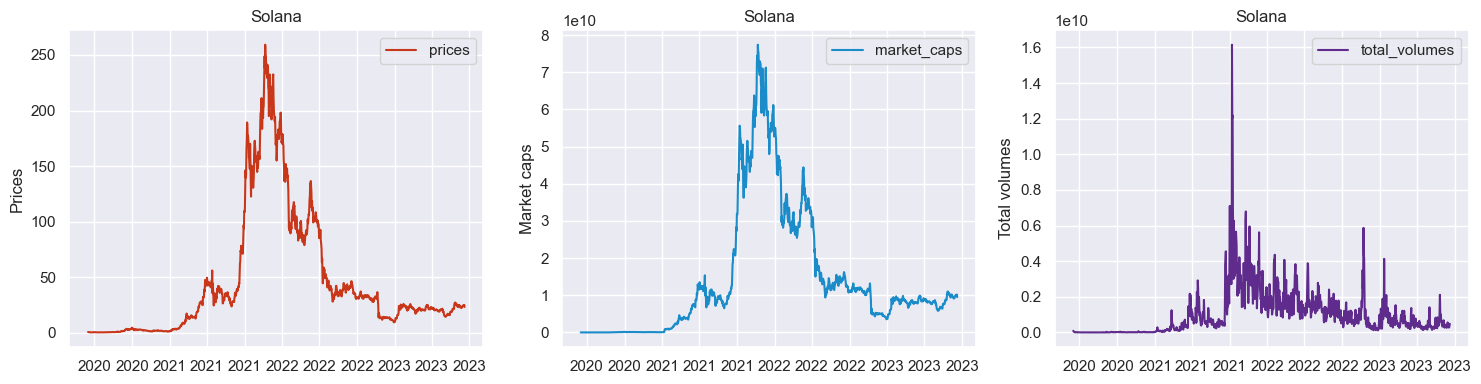

In [22]:
# Smart Contract Platform Coin
df_solana = cg.get_coin_market_chart_by_id(id='solana',vs_currency='usd',days='max')
df_solana['prices'] = cambiar_fecha(df_solana['prices'])
df_solana['market_caps'] = cambiar_fecha(df_solana['market_caps'])
df_solana['total_volumes'] = cambiar_fecha(df_solana['total_volumes'])
dates = [item[0] for item in df_solana['prices']]
prices = [item[1] for item in df_solana['prices']]
market_caps = [item[1] for item in df_solana['market_caps']]
total_volumes = [item[1] for item in df_solana['total_volumes']]
df_solana = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_solana['date'] = pd.to_datetime(df_solana['date'])
df_solana['date'] = df_solana['date'].dt.date
df_solana['id'] = 'solana'
df_solana['symbol'] = 'sol'
# df_solana.to_csv('solana_market_caps_vol.csv', index=False)
print(df_solana)


print(df_solana.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_solana.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Solana')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps    total_volumes    id symbol
0     2017-11-09 0.002387  156404161.617691   1224287.170176  tron    trx
1     2017-11-10 0.002044  133968506.249282    990422.819500  tron    trx
2     2017-11-11 0.001915  125470649.384029    707642.964341  tron    trx
3     2017-11-12 0.001804  118235245.903263    814789.232403  tron    trx
4     2017-11-13 0.002018  132386427.484935    894985.567811  tron    trx
...          ...      ...               ...              ...   ...    ...
2103  2023-08-13 0.077442 6929651166.414886 141044221.110134  tron    trx
2104  2023-08-14 0.077098 6898202666.003469 161679767.282734  tron    trx
2105  2023-08-15 0.077408 6927334273.111429 197002006.356063  tron    trx
2106  2023-08-16 0.076247 6819643424.226117 185587361.475441  tron    trx
2107  2023-08-16 0.076568 6848552424.795426 195250045.899256  tron    trx

[2108 rows x 6 columns]
date             0
prices           0
market_caps      0
total_volumes    0
id         

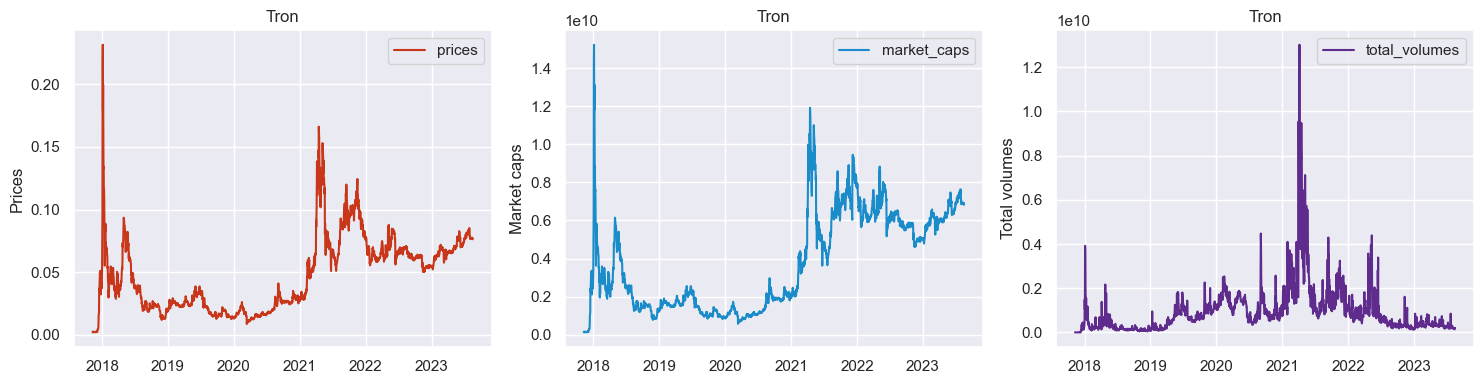

In [23]:
# Smart Contract Platform Coin
df_tron = cg.get_coin_market_chart_by_id(id='tron',vs_currency='usd',days='max')
df_tron['prices'] = cambiar_fecha(df_tron['prices'])
df_tron['market_caps'] = cambiar_fecha(df_tron['market_caps'])
df_tron['total_volumes'] = cambiar_fecha(df_tron['total_volumes'])
dates = [item[0] for item in df_tron['prices']]
prices = [item[1] for item in df_tron['prices']]
market_caps = [item[1] for item in df_tron['market_caps']]
total_volumes = [item[1] for item in df_tron['total_volumes']]
df_tron = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_tron['date'] = pd.to_datetime(df_tron['date'])
df_tron['date'] = df_tron['date'].dt.date
df_tron['id'] = 'tron'
df_tron['symbol'] = 'trx'
# df_tron.to_csv('tron_market_caps_vol.csv', index=False)
print(df_tron)


print(df_tron.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_tron.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Tron')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

<h2>Monedas Estables</h2>

            date   prices        market_caps      total_volumes      id symbol
0     2015-02-25 1.210160      304476.000000           5.000000  tether   usdt
1     2015-03-02 0.572521      144046.000000           2.000000  tether   usdt
2     2015-03-06 1.000000      251600.000000          50.000000  tether   usdt
3     2015-03-07 1.000000      251600.000000       58196.000000  tether   usdt
4     2015-03-08 1.000000      251600.000000          31.000000  tether   usdt
...          ...      ...                ...                ...     ...    ...
3068  2023-08-13 0.999377 83355420569.709549  9189020281.947243  tether   usdt
3069  2023-08-14 0.999384 83303287526.811691  9254138040.705431  tether   usdt
3070  2023-08-15 0.998713 83323482665.833252 12792365654.786800  tether   usdt
3071  2023-08-16 0.998893 83089141821.301987 18746693270.259033  tether   usdt
3072  2023-08-16 0.998410 83061933600.280075 17199875361.554665  tether   usdt

[3073 rows x 6 columns]
date             0
prices  

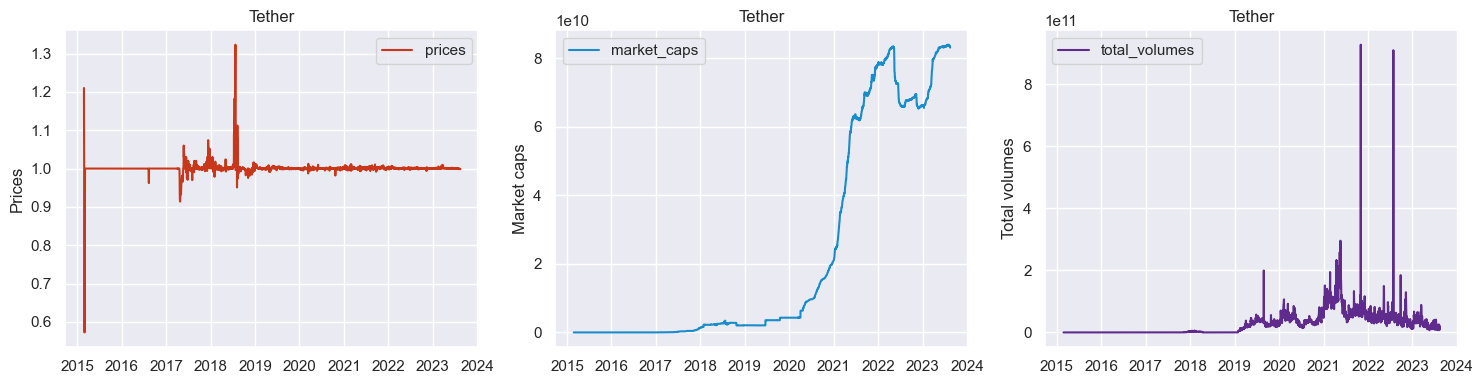

In [24]:
# Stable Coin
df_tether = cg.get_coin_market_chart_by_id(id='tether',vs_currency='usd',days='max')
df_tether['prices'] = cambiar_fecha(df_tether['prices'])
df_tether['market_caps'] = cambiar_fecha(df_tether['market_caps'])
df_tether['total_volumes'] = cambiar_fecha(df_tether['total_volumes'])
dates = [item[0] for item in df_tether['prices']]
prices = [item[1] for item in df_tether['prices']]
market_caps = [item[1] for item in df_tether['market_caps']]
total_volumes = [item[1] for item in df_tether['total_volumes']]
df_tether = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_tether['date'] = pd.to_datetime(df_tether['date'])
df_tether['date'] = df_tether['date'].dt.date
df_tether['id'] = 'tether'
df_tether['symbol'] = 'usdt'
# df_tether.to_csv('tether_market_caps_vol.csv', index=False)
print(df_tether)


print(df_tether.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_tether.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Tether')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

In [25]:
rows = df_tether.iloc[318:343]
rows

,date,prices,market_caps,total_volumes,id,symbol
318,2016-01-18,1.000000,1451600.000000,160999.000000,tether,usdt
319,2016-01-19,1.000000,1451600.000000,11865.000000,tether,usdt
320,2016-01-20,1.000000,1451600.000000,16737.000000,tether,usdt
321,2016-01-21,1.000000,1451600.000000,35946.000000,tether,usdt
322,2016-01-22,1.000000,1451600.000000,26663.000000,tether,usdt
323,2016-01-23,1.000000,1451600.000000,21927.000000,tether,usdt
324,2016-01-24,1.000000,1451600.000000,22933.000000,tether,usdt
325,2016-01-25,1.000000,1451600.000000,39331.000000,tether,usdt
326,2016-01-26,1.000000,1451600.000000,77011.000000,tether,usdt
327,2016-01-27,1.000000,1451600.000000,77011.000000,tether,usdt


In [26]:
df_tether = df_tether.iloc[2:].reset_index(drop=True)
# df_tether.to_csv('tether_market_caps_vol.csv', index=False)
df_tether

,date,prices,market_caps,total_volumes,id,symbol
0,2015-03-06,1.000000,251600.000000,50.000000,tether,usdt
1,2015-03-07,1.000000,251600.000000,58196.000000,tether,usdt
2,2015-03-08,1.000000,251600.000000,31.000000,tether,usdt
3,2015-03-09,1.000000,251600.000000,137.000000,tether,usdt
4,2015-03-10,1.000000,251600.000000,50006.000000,tether,usdt
...,...,...,...,...,...,...
3066,2023-08-13,0.999377,83355420569.709549,9189020281.947243,tether,usdt
3067,2023-08-14,0.999384,83303287526.811691,9254138040.705431,tether,usdt
3068,2023-08-15,0.998713,83323482665.833252,12792365654.786800,tether,usdt
3069,2023-08-16,0.998893,83089141821.301987,18746693270.259033,tether,usdt


            date   prices        market_caps     total_volumes        id  \
0     2018-10-05 1.006242           0.000000      31264.420430  usd-coin   
1     2018-10-06 1.001530           0.000000      20254.712255  usd-coin   
2     2018-10-07 1.001177           0.000000      49324.690669  usd-coin   
3     2018-10-08 1.001906           0.000000      47076.728142  usd-coin   
4     2018-10-09 1.001983           0.000000      55542.215509  usd-coin   
...          ...      ...                ...               ...       ...   
1773  2023-08-13 0.999880 26161944529.388718 1242418455.693650  usd-coin   
1774  2023-08-14 0.999981 26180583371.681644 1681826723.969787  usd-coin   
1775  2023-08-15 0.999688 26004359971.611671 2461885539.995641  usd-coin   
1776  2023-08-16 0.999975 26032843936.259975 3215612150.837099  usd-coin   
1777  2023-08-16 1.000949 26036520242.561306 1887331679.138523  usd-coin   

     symbol  
0      usdc  
1      usdc  
2      usdc  
3      usdc  
4      usdc  
...

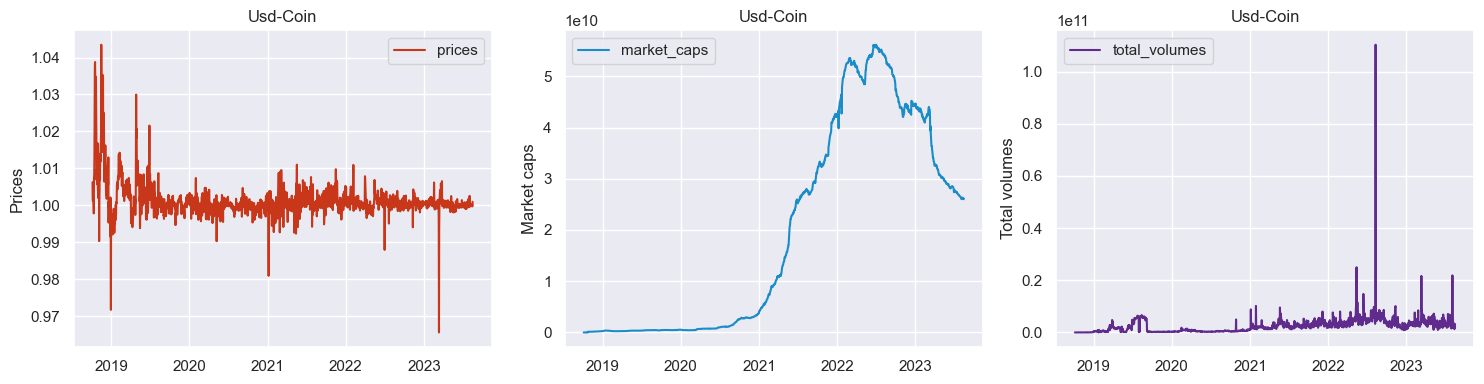

In [27]:
# Stable Coin
df_usd_coin = cg.get_coin_market_chart_by_id(id='usd-coin',vs_currency='usd',days='max')
df_usd_coin['prices'] = cambiar_fecha(df_usd_coin['prices'])
df_usd_coin['market_caps'] = cambiar_fecha(df_usd_coin['market_caps'])
df_usd_coin['total_volumes'] = cambiar_fecha(df_usd_coin['total_volumes'])
dates = [item[0] for item in df_usd_coin['prices']]
prices = [item[1] for item in df_usd_coin['prices']]
market_caps = [item[1] for item in df_usd_coin['market_caps']]
total_volumes = [item[1] for item in df_usd_coin['total_volumes']]
df_usd_coin = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_usd_coin['date'] = pd.to_datetime(df_usd_coin['date'])
df_usd_coin['date'] = df_usd_coin['date'].dt.date
df_usd_coin['id'] = 'usd-coin'
df_usd_coin['symbol'] = 'usdc'
# df_usd_coin.to_csv('usd_coin_market_caps_vol.csv', index=False)
print(df_usd_coin)


print(df_usd_coin.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_usd_coin.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Usd-Coin')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps   total_volumes   id symbol
0     2019-11-19 1.000651    1437645.883635   872764.202140  dai    dai
1     2019-11-20 0.995411    6945898.406514  4841468.549063  dai    dai
2     2019-11-21 0.991591    8989928.013739  1007819.527859  dai    dai
3     2019-11-22 0.991102   12494872.076605  3679539.548076  dai    dai
4     2019-11-23 0.992850   14391748.486609  7201905.087479  dai    dai
...          ...      ...               ...             ...  ...    ...
1363  2023-08-13 0.999730 4007856491.408019 68155296.483897  dai    dai
1364  2023-08-14 1.000150 3992763292.477333 72469695.198445  dai    dai
1365  2023-08-15 0.999849 3965955127.581728 70684965.668604  dai    dai
1366  2023-08-16 0.999731 3926990689.244198 85940443.776742  dai    dai
1367  2023-08-16 0.999901 3928771564.711332 83571409.933817  dai    dai

[1368 rows x 6 columns]
date             0
prices           0
market_caps      0
total_volumes    0
id               0
symbol          

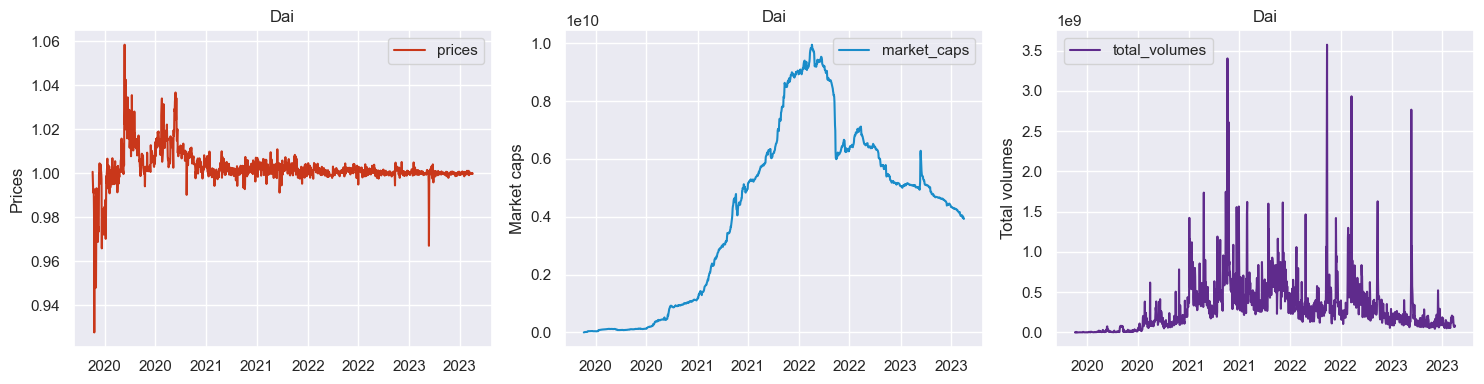

In [28]:
# Stable Coin
df_dai = cg.get_coin_market_chart_by_id(id='dai',vs_currency='usd',days='max')
df_dai['prices'] = cambiar_fecha(df_dai['prices'])
df_dai['market_caps'] = cambiar_fecha(df_dai['market_caps'])
df_dai['total_volumes'] = cambiar_fecha(df_dai['total_volumes'])
dates = [item[0] for item in df_dai['prices']]
prices = [item[1] for item in df_dai['prices']]
market_caps = [item[1] for item in df_dai['market_caps']]
total_volumes = [item[1] for item in df_dai['total_volumes']]
df_dai = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_dai['date'] = pd.to_datetime(df_dai['date'])
df_dai['date'] = df_dai['date'].dt.date
df_dai['id'] = 'dai'
df_dai['symbol'] = 'dai'
# df_dai.to_csv('dai_market_caps_vol.csv', index=False)
print(df_dai)


print(df_dai.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_dai.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Dai')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps     total_volumes           id  \
0     2019-09-21 1.000332          0.000000     255769.444784  binance-usd   
1     2019-09-22 1.000671          0.000000     182705.826735  binance-usd   
2     2019-09-23 0.999807          0.000000     150076.502061  binance-usd   
3     2019-09-24 0.999933          0.000000    1528187.940941  binance-usd   
4     2019-09-25 1.002317          0.000000    4093715.375718  binance-usd   
...          ...      ...               ...               ...          ...   
1422  2023-08-13 0.999952 3371366634.394361 1180223388.065527  binance-usd   
1423  2023-08-14 0.999262 3369387146.131501  644726176.595104  binance-usd   
1424  2023-08-15 0.999895 3357144658.679984 1444236287.542690  binance-usd   
1425  2023-08-16 0.999627 3336755407.444006 1500931948.740618  binance-usd   
1426  2023-08-16 1.000406 3313339891.025695 1581922315.771164  binance-usd   

     symbol  
0      busd  
1      busd  
2      busd  
3      

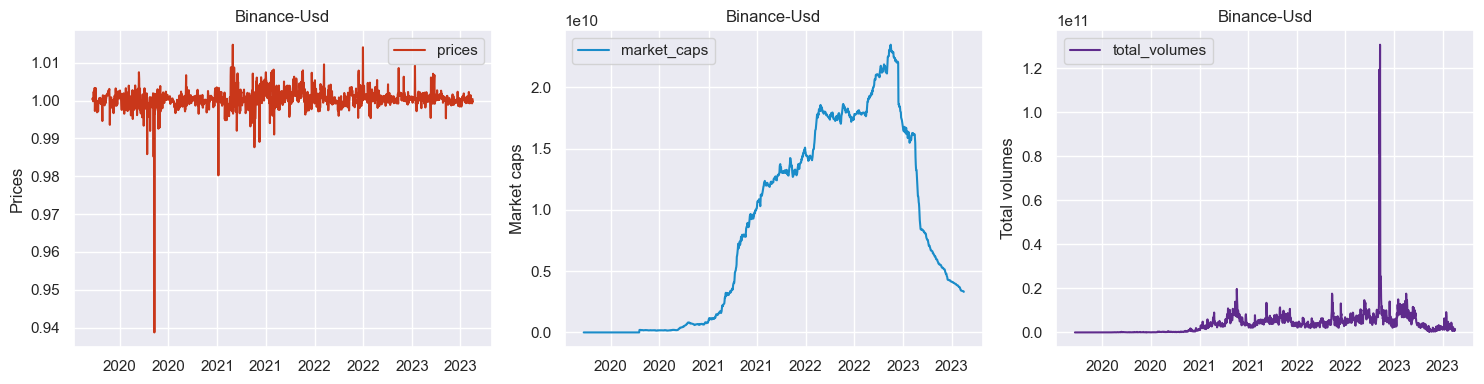

In [29]:
# Stable Coin
df_binance_usd = cg.get_coin_market_chart_by_id(id='binance-usd',vs_currency='usd',days='max')
df_binance_usd['prices'] = cambiar_fecha(df_binance_usd['prices'])
df_binance_usd['market_caps'] = cambiar_fecha(df_binance_usd['market_caps'])
df_binance_usd['total_volumes'] = cambiar_fecha(df_binance_usd['total_volumes'])
dates = [item[0] for item in df_binance_usd['prices']]
prices = [item[1] for item in df_binance_usd['prices']]
market_caps = [item[1] for item in df_binance_usd['market_caps']]
total_volumes = [item[1] for item in df_binance_usd['total_volumes']]
df_binance_usd = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_binance_usd['date'] = pd.to_datetime(df_binance_usd['date'])
df_binance_usd['date'] = df_binance_usd['date'].dt.date
df_binance_usd['id'] = 'binance-usd'
df_binance_usd['symbol'] = 'busd'
# df_binance_usd.to_csv('binance_usd_market_caps_vol.csv', index=False)
print(df_binance_usd)


print(df_binance_usd.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_binance_usd.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Binance-Usd')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps     total_volumes        id symbol
0     2018-03-23 1.005918    6618487.544399    4879159.895938  true-usd   tusd
1     2018-03-24 0.998446    6569325.710396    3141895.271719  true-usd   tusd
2     2018-03-25 0.989117    7837876.293890    1447413.695221  true-usd   tusd
3     2018-03-26 0.996653    7897589.369341    1413981.651350  true-usd   tusd
4     2018-03-27 0.999969    7923872.658186    3379900.945773  true-usd   tusd
...          ...      ...               ...               ...       ...    ...
1969  2023-08-13 0.999462 2971583199.213842  693415022.264236  true-usd   tusd
1970  2023-08-14 0.998714 2971640108.805292  915942392.216937  true-usd   tusd
1971  2023-08-15 0.998380 2782598093.052522 2473180011.776296  true-usd   tusd
1972  2023-08-16 0.999126 2748982572.343445 2043435059.233415  true-usd   tusd
1973  2023-08-16 0.999642 2750989721.975996 2082871035.691412  true-usd   tusd

[1974 rows x 6 columns]
date             0
prices  

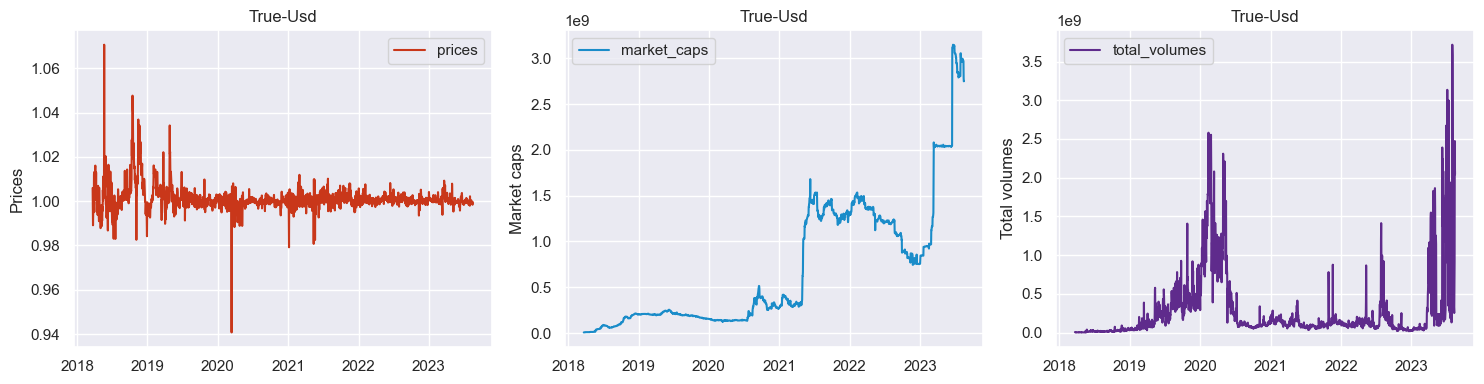

In [30]:
# Stable Coin
df_true_usd = cg.get_coin_market_chart_by_id(id='true-usd',vs_currency='usd',days='max')
df_true_usd['prices'] = cambiar_fecha(df_true_usd['prices'])
df_true_usd['market_caps'] = cambiar_fecha(df_true_usd['market_caps'])
df_true_usd['total_volumes'] = cambiar_fecha(df_true_usd['total_volumes'])
dates = [item[0] for item in df_true_usd['prices']]
prices = [item[1] for item in df_true_usd['prices']]
market_caps = [item[1] for item in df_true_usd['market_caps']]
total_volumes = [item[1] for item in df_true_usd['total_volumes']]
df_true_usd = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_true_usd['date'] = pd.to_datetime(df_true_usd['date'])
df_true_usd['date'] = df_true_usd['date'].dt.date
df_true_usd['id'] = 'true-usd'
df_true_usd['symbol'] = 'tusd'
# df_true_usd.to_csv('true_usd_market_caps_vol.csv', index=False)
print(df_true_usd)


print(df_true_usd.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_true_usd.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('True-Usd')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

<h2>Finanzas Descentralizadas</h2>

           date      prices        market_caps   total_volumes            id  \
0    2020-12-22  617.164997           0.000000   137563.026557  staked-ether   
1    2020-12-23  617.164997           0.000000   137563.026557  staked-ether   
2    2020-12-24  596.767711     4424223.373088    67102.259216  staked-ether   
3    2020-12-25  611.504712     5651612.707359    54336.794215  staked-ether   
4    2020-12-26  624.800420     7284743.945719    45933.064541  staked-ether   
..          ...         ...                ...             ...           ...   
964  2023-08-13 1846.710998 14933314406.103376  2289124.384821  staked-ether   
965  2023-08-14 1837.912572 14877132696.766102  3616811.894007  staked-ether   
966  2023-08-15 1842.552503 14932196393.363676  5027849.070381  staked-ether   
967  2023-08-16 1826.361340 14849881755.752842 18299361.448947  staked-ether   
968  2023-08-16 1822.619874 14829782799.789562 23586546.219363  staked-ether   

    symbol  
0    steth  
1    steth  


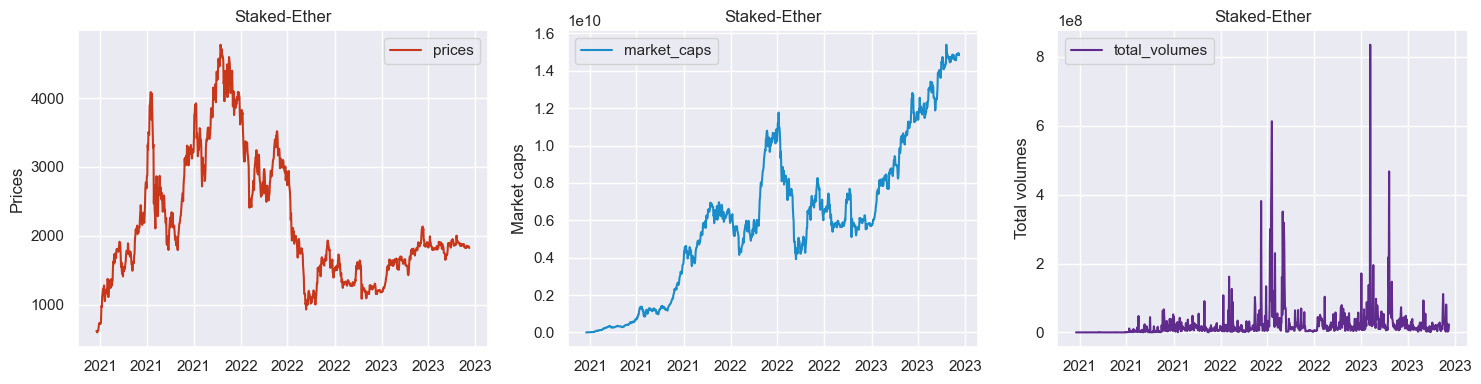

In [31]:
# Decentralized Finance Coin
df_staked_ether = cg.get_coin_market_chart_by_id(id='staked-ether',vs_currency='usd',days='max')
df_staked_ether['prices'] = cambiar_fecha(df_staked_ether['prices'])
df_staked_ether['market_caps'] = cambiar_fecha(df_staked_ether['market_caps'])
df_staked_ether['total_volumes'] = cambiar_fecha(df_staked_ether['total_volumes'])
dates = [item[0] for item in df_staked_ether['prices']]
prices = [item[1] for item in df_staked_ether['prices']]
market_caps = [item[1] for item in df_staked_ether['market_caps']]
total_volumes = [item[1] for item in df_staked_ether['total_volumes']]
df_staked_ether = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_staked_ether['date'] = pd.to_datetime(df_staked_ether['date'])
df_staked_ether['date'] = df_staked_ether['date'].dt.date
df_staked_ether['id'] = 'staked-ether'
df_staked_ether['symbol'] = 'steth'
# df_staked_ether.to_csv('staked_ether_market_caps_vol.csv', index=False)
print(df_staked_ether)


print(df_staked_ether.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_staked_ether.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Staked-Ether')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps     total_volumes       id symbol
0     2020-09-17 3.443832  219913212.478698 1802085330.293668  uniswap    uni
1     2020-09-18 3.443832  219913212.478698 1802085330.293668  uniswap    uni
2     2020-09-19 7.097694  732822061.033078 5688408416.882498  uniswap    uni
3     2020-09-20 5.702061  647208421.070714 2050756493.492213  uniswap    uni
4     2020-09-21 5.256579  632421347.516945 1316669226.584856  uniswap    uni
...          ...      ...               ...               ...      ...    ...
1060  2023-08-13 6.217057 4684980241.023930   61425373.166133  uniswap    uni
1061  2023-08-14 6.088591 4587587707.722947   51621919.524965  uniswap    uni
1062  2023-08-15 6.257407 4718189346.858134   82473378.470172  uniswap    uni
1063  2023-08-16 5.959560 4489882344.513589  103881126.309085  uniswap    uni
1064  2023-08-16 5.824749 4395965912.370676  122586768.974340  uniswap    uni

[1065 rows x 6 columns]
date             0
prices           0
m

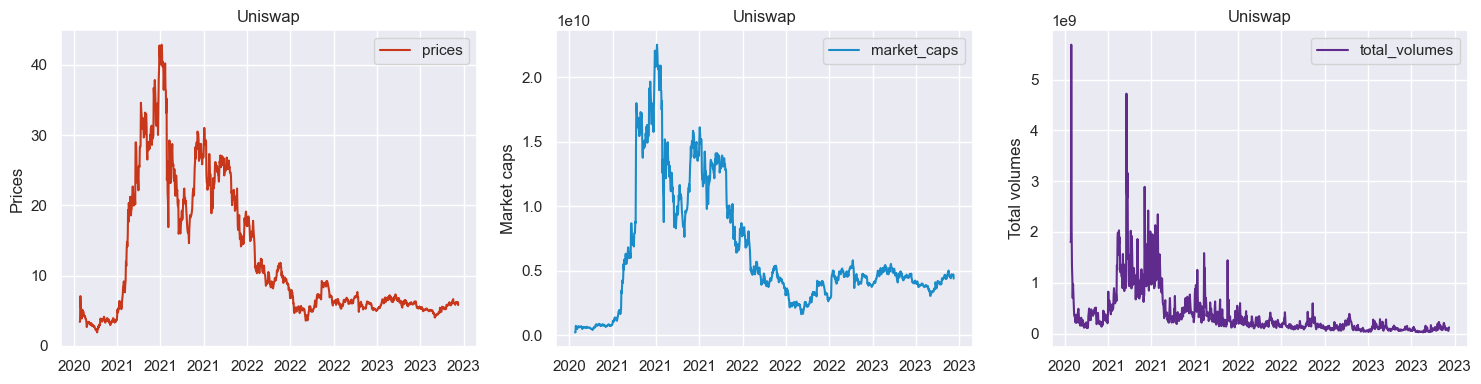

In [32]:
# Decentralized Finance Coin
df_uniswap = cg.get_coin_market_chart_by_id(id='uniswap',vs_currency='usd',days='max')
df_uniswap['prices'] = cambiar_fecha(df_uniswap['prices'])
df_uniswap['market_caps'] = cambiar_fecha(df_uniswap['market_caps'])
df_uniswap['total_volumes'] = cambiar_fecha(df_uniswap['total_volumes'])
dates = [item[0] for item in df_uniswap['prices']]
prices = [item[1] for item in df_uniswap['prices']]
market_caps = [item[1] for item in df_uniswap['market_caps']]
total_volumes = [item[1] for item in df_uniswap['total_volumes']]
df_uniswap = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_uniswap['date'] = pd.to_datetime(df_uniswap['date'])
df_uniswap['date'] = df_uniswap['date'].dt.date
df_uniswap['id'] = 'uniswap'
df_uniswap['symbol'] = 'uni'
# df_uniswap.to_csv('uniswap_market_caps_vol.csv', index=False)
print(df_uniswap)


print(df_uniswap.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_uniswap.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Uniswap')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date   prices       market_caps    total_volumes         id symbol
0     2017-11-09 0.225377   78881828.348247   3190025.855166  chainlink   link
1     2017-11-10 0.189036   66162748.000257   2121175.273130  chainlink   link
2     2017-11-11 0.181223   63427934.797573   2229297.696601  chainlink   link
3     2017-11-12 0.170013   59504620.609935   5361145.800395  chainlink   link
4     2017-11-13 0.180691   63241859.461104   2942234.064639  chainlink   link
...          ...      ...               ...              ...        ...    ...
2103  2023-08-13 7.437998 3999477596.953169 117309616.793088  chainlink   link
2104  2023-08-14 7.368214 3961551286.364952 148526924.704120  chainlink   link
2105  2023-08-15 7.411531 3991601054.760039 241856951.668788  chainlink   link
2106  2023-08-16 7.041426 3788082360.482180 287565277.962781  chainlink   link
2107  2023-08-16 6.829187 3673627514.324756 329147657.530225  chainlink   link

[2108 rows x 6 columns]
date             0
prices  

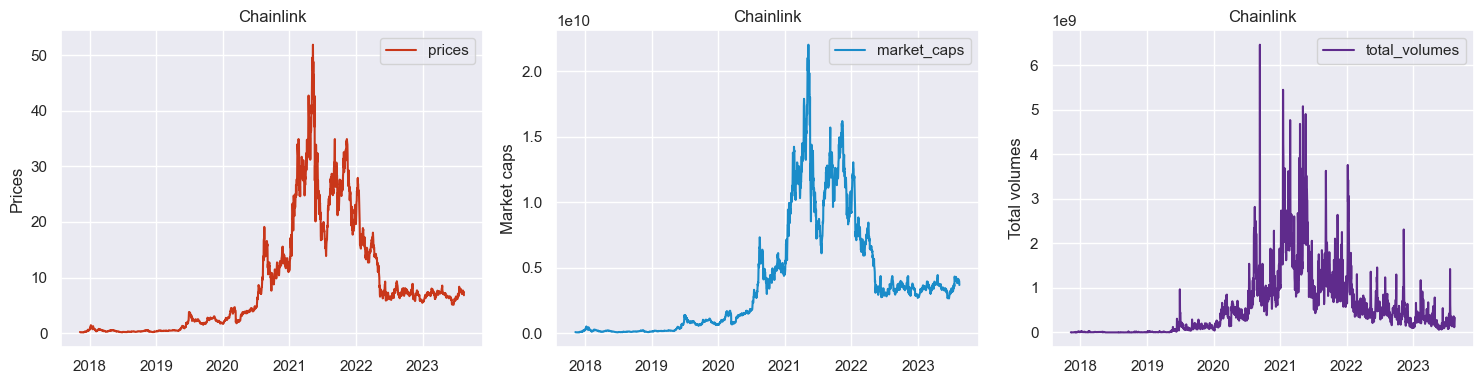

In [33]:
# Decentralized Finance Coin
df_chainlink = cg.get_coin_market_chart_by_id(id='chainlink',vs_currency='usd',days='max')
df_chainlink['prices'] = cambiar_fecha(df_chainlink['prices'])
df_chainlink['market_caps'] = cambiar_fecha(df_chainlink['market_caps'])
df_chainlink['total_volumes'] = cambiar_fecha(df_chainlink['total_volumes'])
dates = [item[0] for item in df_chainlink['prices']]
prices = [item[1] for item in df_chainlink['prices']]
market_caps = [item[1] for item in df_chainlink['market_caps']]
total_volumes = [item[1] for item in df_chainlink['total_volumes']]
df_chainlink = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_chainlink['date'] = pd.to_datetime(df_chainlink['date'])
df_chainlink['date'] = df_chainlink['date'].dt.date
df_chainlink['id'] = 'chainlink'
df_chainlink['symbol'] = 'link'
# df_chainlink.to_csv('chainlink_market_caps_vol.csv', index=False)
print(df_chainlink)


print(df_chainlink.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_chainlink.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Chainlink')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

           date   prices       market_caps   total_volumes        id symbol
0    2021-01-05 1.750891    5193325.774885 12582828.723461  lido-dao    ldo
1    2021-01-06 1.750891    5193325.774885 12582828.723461  lido-dao    ldo
2    2021-01-07 1.760411    5667691.609361  6423586.093913  lido-dao    ldo
3    2021-01-08 1.426809    4586996.157828  2079384.121385  lido-dao    ldo
4    2021-01-09 1.495403    4803312.257939  1086874.849088  lido-dao    ldo
..          ...      ...               ...             ...       ...    ...
950  2023-08-13 1.841980 1619802235.093571 60415762.901991  lido-dao    ldo
951  2023-08-14 1.816733 1596774843.535564 62667323.201736  lido-dao    ldo
952  2023-08-15 1.842955 1619909180.659820 54660327.810057  lido-dao    ldo
953  2023-08-16 1.727347 1519327333.483565 50949503.422446  lido-dao    ldo
954  2023-08-16 1.732256 1521421622.583355 50677478.432793  lido-dao    ldo

[955 rows x 6 columns]
date             0
prices           0
market_caps      0
total_v

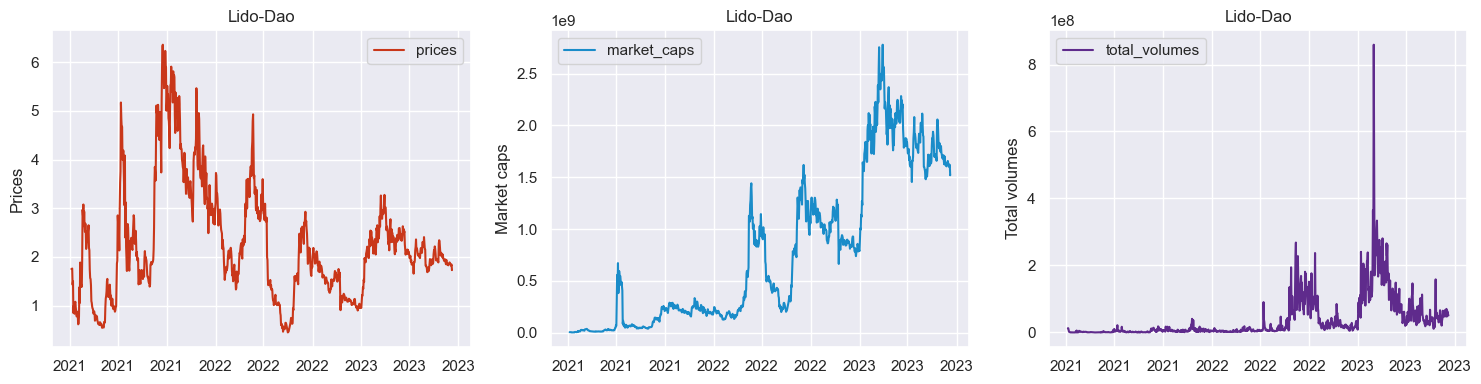

In [34]:
# Decentralized Finance Coin
df_lido_dao = cg.get_coin_market_chart_by_id(id='lido-dao',vs_currency='usd',days='max')
df_lido_dao['prices'] = cambiar_fecha(df_lido_dao['prices'])
df_lido_dao['market_caps'] = cambiar_fecha(df_lido_dao['market_caps'])
df_lido_dao['total_volumes'] = cambiar_fecha(df_lido_dao['total_volumes'])
dates = [item[0] for item in df_lido_dao['prices']]
prices = [item[1] for item in df_lido_dao['prices']]
market_caps = [item[1] for item in df_lido_dao['market_caps']]
total_volumes = [item[1] for item in df_lido_dao['total_volumes']]
df_lido_dao = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_lido_dao['date'] = pd.to_datetime(df_lido_dao['date'])
df_lido_dao['date'] = df_lido_dao['date'].dt.date
df_lido_dao['id'] = 'lido-dao'
df_lido_dao['symbol'] = 'ldo'
# df_lido_dao.to_csv('lido_dao_market_caps_vol.csv', index=False)
print(df_lido_dao)


print(df_lido_dao.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_lido_dao.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Lido-Dao')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

            date      prices       market_caps    total_volumes     id symbol
0     2017-12-20 1089.367108          0.000000    549285.040796  maker    mkr
1     2017-12-21 1514.260031          0.000000      1620.258233  maker    mkr
2     2017-12-22  873.829216          0.000000     34285.563105  maker    mkr
3     2017-12-23 1042.820865          0.000000    199742.109292  maker    mkr
4     2017-12-24 1240.926279          0.000000     71416.798687  maker    mkr
...          ...         ...               ...              ...    ...    ...
2062  2023-08-13 1223.480293 1103273300.089003 100738601.594187  maker    mkr
2063  2023-08-14 1244.501965 1121091974.310278 102183147.537389  maker    mkr
2064  2023-08-15 1249.246048 1128180078.095715 127364618.754362  maker    mkr
2065  2023-08-16 1233.292077 1111560271.094302 100629754.626560  maker    mkr
2066  2023-08-16 1205.806818 1088004050.002390 110022417.231174  maker    mkr

[2067 rows x 6 columns]
date             0
prices           0
m

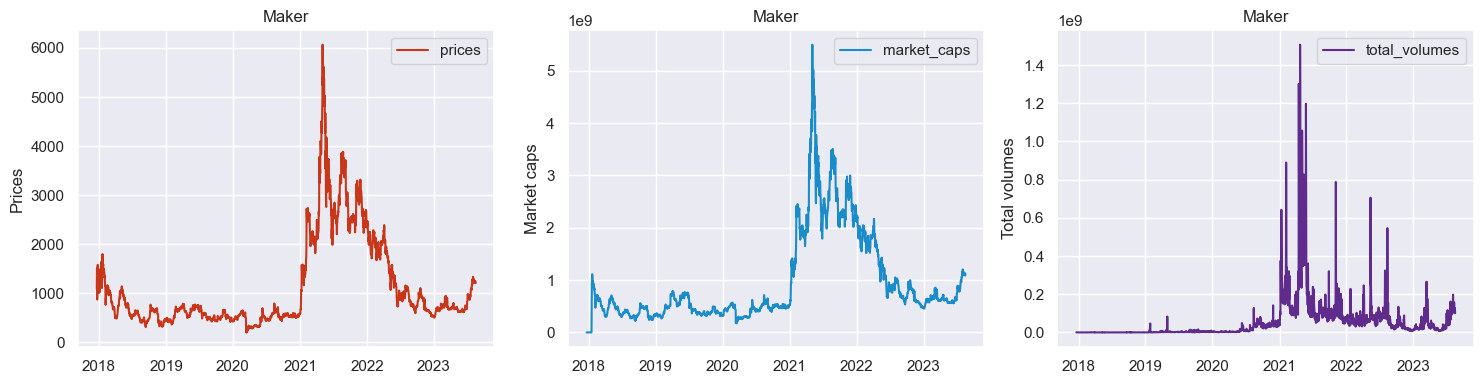

In [35]:
# Decentralized Finance Coin
df_maker = cg.get_coin_market_chart_by_id(id='maker',vs_currency='usd',days='max')
df_maker['prices'] = cambiar_fecha(df_maker['prices'])
df_maker['market_caps'] = cambiar_fecha(df_maker['market_caps'])
df_maker['total_volumes'] = cambiar_fecha(df_maker['total_volumes'])
dates = [item[0] for item in df_maker['prices']]
prices = [item[1] for item in df_maker['prices']]
market_caps = [item[1] for item in df_maker['market_caps']]
total_volumes = [item[1] for item in df_maker['total_volumes']]
df_maker = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
df_maker['date'] = pd.to_datetime(df_maker['date'])
df_maker['date'] = df_maker['date'].dt.date
df_maker['id'] = 'maker'
df_maker['symbol'] = 'mkr'
# df_maker.to_csv('maker_market_caps_vol.csv', index=False)
print(df_maker)


print(df_maker.isnull().sum())


nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
count = 0
for r in range(nrow):
    for c in range(ncol):
        if count < len(columns_to_plot):
            column_name = columns_to_plot[count]
            ax = df_maker.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
            ax.set_title('Maker')
            locator = AutoDateLocator()
            ax.xaxis.set_major_locator(locator)
            formatter = DateFormatter('%Y')
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel(None)
            ax.set_ylabel(column_name.replace('_', ' ').capitalize())
            count += 1
        else:
            axes[r, c].axis('off')
plt.tight_layout()
plt.show()

Graficamos todos los DataFrames a través de la columna 'market-caps' para identificar su movimiento en el tiempo

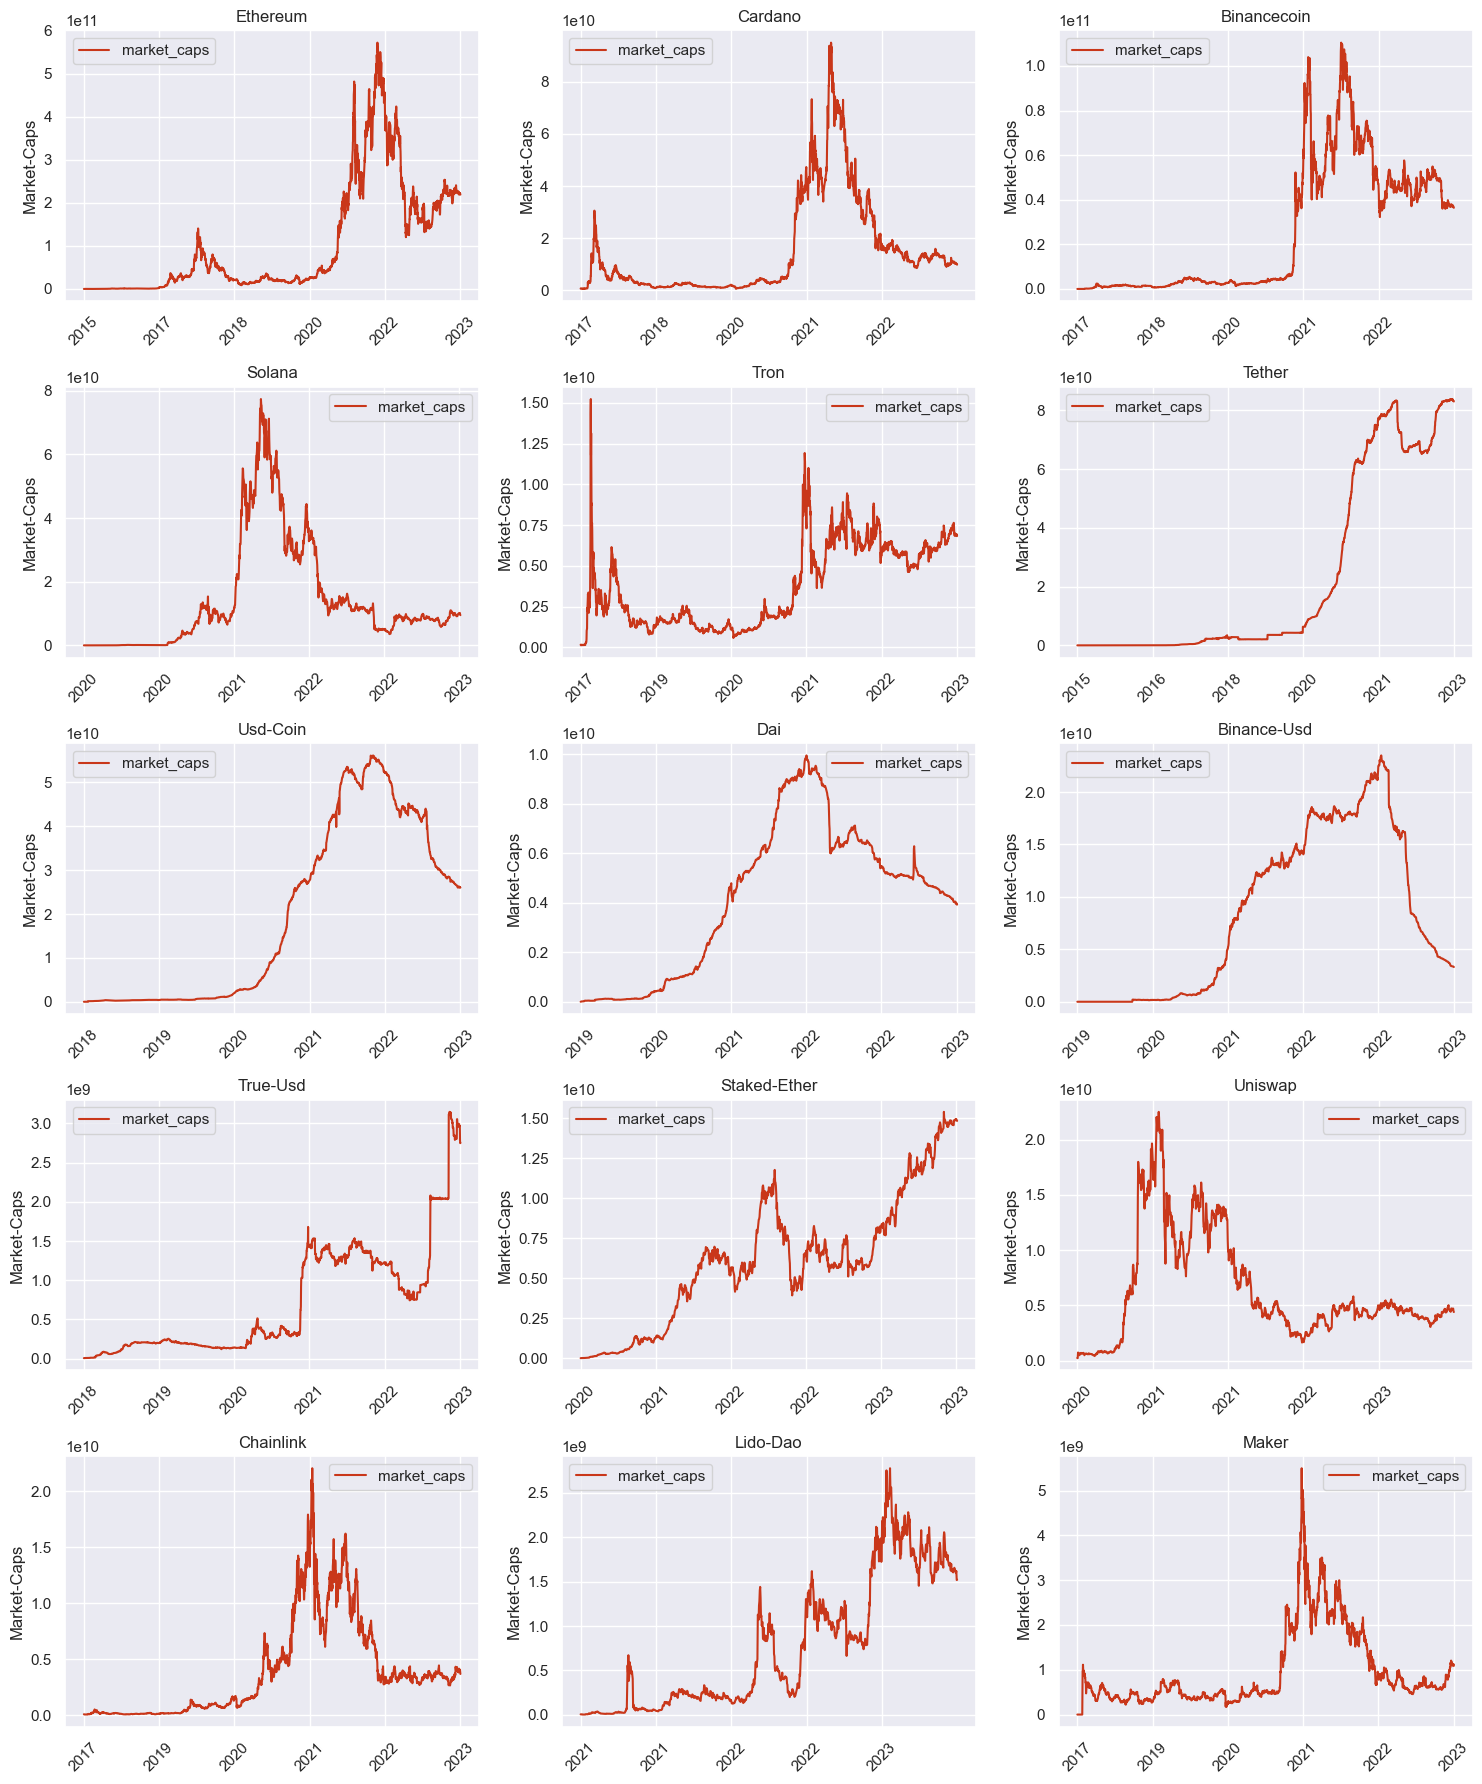

In [36]:
nrow = 5
ncol = 3

df_dict = {
    'Ethereum': df_ethereum,
    'Cardano': df_cardano,
    'Binancecoin': df_binancecoin,
    'Solana': df_solana,
    'Tron': df_tron,
    'Tether': df_tether,
    'Usd-Coin': df_usd_coin,
    'Dai': df_dai,
    'Binance-Usd': df_binance_usd,
    'True-Usd': df_true_usd,
    'Staked-Ether': df_staked_ether,
    'Uniswap': df_uniswap,
    'Chainlink': df_chainlink,
    'Lido-Dao': df_lido_dao,
    'Maker': df_maker
}

for df_name, df in df_dict.items():
    df['date'] = pd.to_datetime(df['date'])

color = ['#c9371a']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 18))
count = 0

for r in range(nrow):
    for c in range(ncol):
        if count < len(df_dict):  # Ensure we have more dataframes to plot
            df_name = list(df_dict.keys())[count]  # Get the name of the current dataframe
            df = df_dict[df_name]
            ax = df['market_caps'].plot(ax=axes[r, c], color=color)  # Plot the 'close' column
            axes[r, c].set_title(f'{df_name}')  # Use the dataframe name as the title
            axes[r, c].set_xticks(range(0, len(df), len(df)//5))  # Customize x-axis tick positions
            axes[r, c].set_xticklabels(df['date'][::len(df)//5].dt.year, rotation=45)   # Customize x-axis tick labels
            axes[r, c].set_ylabel('Market-Caps')
            ax.legend()
            count += 1
        else:
            axes[r, c].axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()

Unimos los DataFrames en horizontal para poder graficarlos más facilmente

In [37]:
def rename_columns(df, suffix):
    for col in df.columns:
        if col != 'date':
            df.rename(columns={col: col + suffix}, inplace=True)

# Renombrar columnas de cada DataFrame
rename_columns(df_ethereum, '_ethereum')
rename_columns(df_cardano, '_cardano')
rename_columns(df_binancecoin, '_binancecoin')
rename_columns(df_solana, '_solana')
rename_columns(df_tron, '_tron')
rename_columns(df_tether, '_tether')
rename_columns(df_usd_coin, '_usd_coin')
rename_columns(df_dai, '_dai')
rename_columns(df_binance_usd, '_binance_usd')
rename_columns(df_true_usd, '_true_usd')
rename_columns(df_staked_ether, '_staked_ether')
rename_columns(df_uniswap, '_uniswap')
rename_columns(df_chainlink, '_chainlink')
rename_columns(df_lido_dao, '_lido_dao')
rename_columns(df_maker, '_maker')

In [38]:
merged_df = df_ethereum.merge(df_cardano, on='date', how='outer')
merged_df = merged_df.merge(df_binancecoin, on='date', how='outer')
merged_df = merged_df.merge(df_solana, on='date', how='outer')
merged_df = merged_df.merge(df_tron, on='date', how='outer')
merged_df = merged_df.merge(df_tether, on='date', how='outer')
merged_df = merged_df.merge(df_usd_coin, on='date', how='outer')
merged_df = merged_df.merge(df_dai, on='date', how='outer')
merged_df = merged_df.merge(df_binance_usd, on='date', how='outer')
merged_df = merged_df.merge(df_true_usd, on='date', how='outer')
merged_df = merged_df.merge(df_staked_ether, on='date', how='outer')
merged_df = merged_df.merge(df_uniswap, on='date', how='outer')
merged_df = merged_df.merge(df_chainlink, on='date', how='outer')
merged_df = merged_df.merge(df_lido_dao, on='date', how='outer')
merged_df = merged_df.merge(df_maker, on='date', how='outer')

In [39]:
merged_df.drop_duplicates(subset='date', inplace=True)
merged_df = merged_df.sort_values(by='date')
merged_df.reset_index(drop=True, inplace=True)
# merged_df.to_csv('merged_market_caps_vol.csv', index=False)
merged_df

,date,prices_ethereum,market_caps_ethereum,total_volumes_ethereum,id_ethereum,symbol_ethereum,prices_cardano,market_caps_cardano,total_volumes_cardano,id_cardano,...,prices_lido_dao,market_caps_lido_dao,total_volumes_lido_dao,id_lido_dao,symbol_lido_dao,prices_maker,market_caps_maker,total_volumes_maker,id_maker,symbol_maker
0,2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,2023-08-12,1847.541835,222019374228.764862,3694816570.962365,ethereum,eth,0.293325,10278658176.642065,124610584.574409,cardano,...,1.855280,1629305083.238796,47503205.468679,lido-dao,ldo,1248.585720,1126020188.672116,121704129.835505,maker,mkr
3081,2023-08-13,1848.505239,222069758272.727417,2215986526.701653,ethereum,eth,0.291666,10217585439.953056,105607968.604844,cardano,...,1.841980,1619802235.093571,60415762.901991,lido-dao,ldo,1223.480293,1103273300.089003,100738601.594187,maker,mkr
3082,2023-08-14,1839.512810,220948326523.333557,3642424563.740612,ethereum,eth,0.289372,10135047904.827347,125106297.155349,cardano,...,1.816733,1596774843.535564,62667323.201736,lido-dao,ldo,1244.501965,1121091974.310278,102183147.537389,maker,mkr
3083,2023-08-15,1843.513391,221564238004.308777,4495324729.871393,ethereum,eth,0.290452,10181963472.170074,129874470.395376,cardano,...,1.842955,1619909180.659820,54660327.810057,lido-dao,ldo,1249.246048,1128180078.095715,127364618.754362,maker,mkr


Creamos una Matriz de Confución para los distintos valores extraidos de los Dataframes anteriores

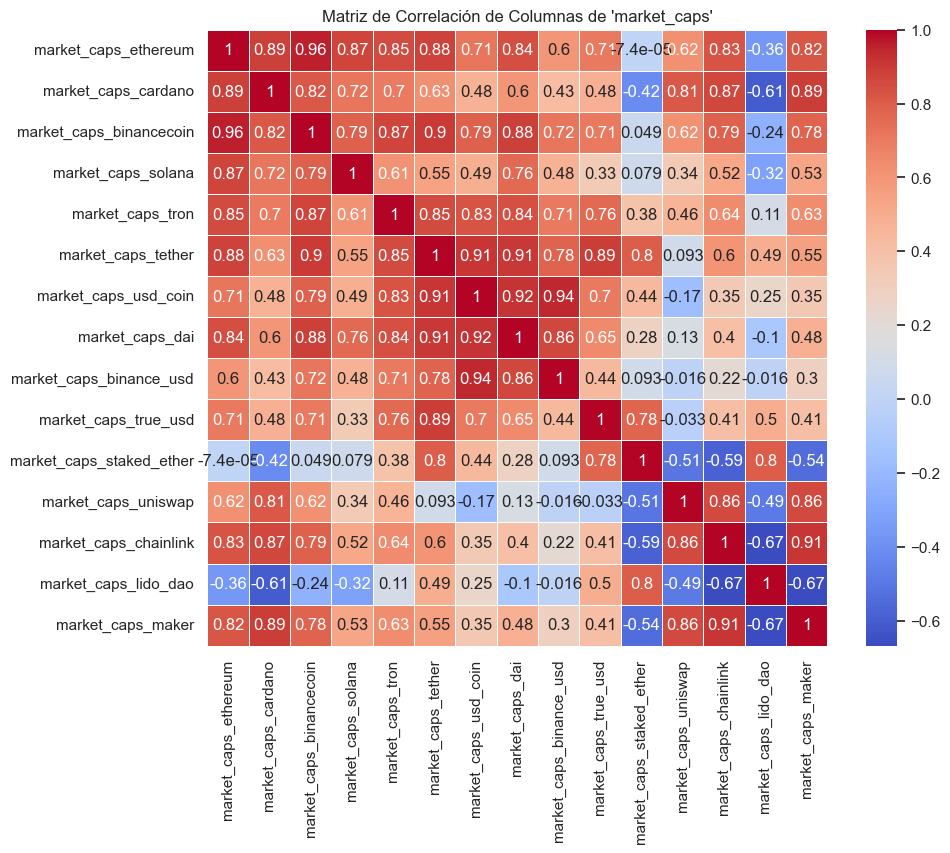

In [40]:
correlation_market_caps = merged_df.filter(like='market_caps').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_market_caps, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'market_caps'")
plt.show()

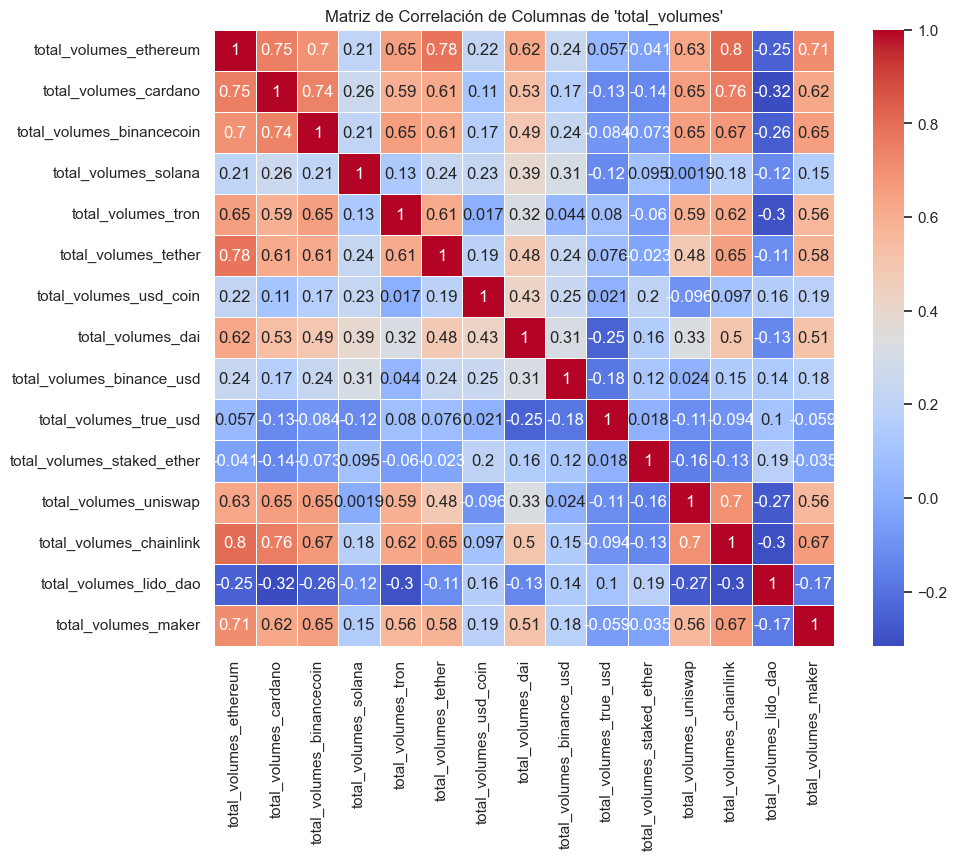

In [41]:
correlation_volumes = merged_df.filter(like='total_volumes').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_volumes, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'total_volumes'")
plt.show()

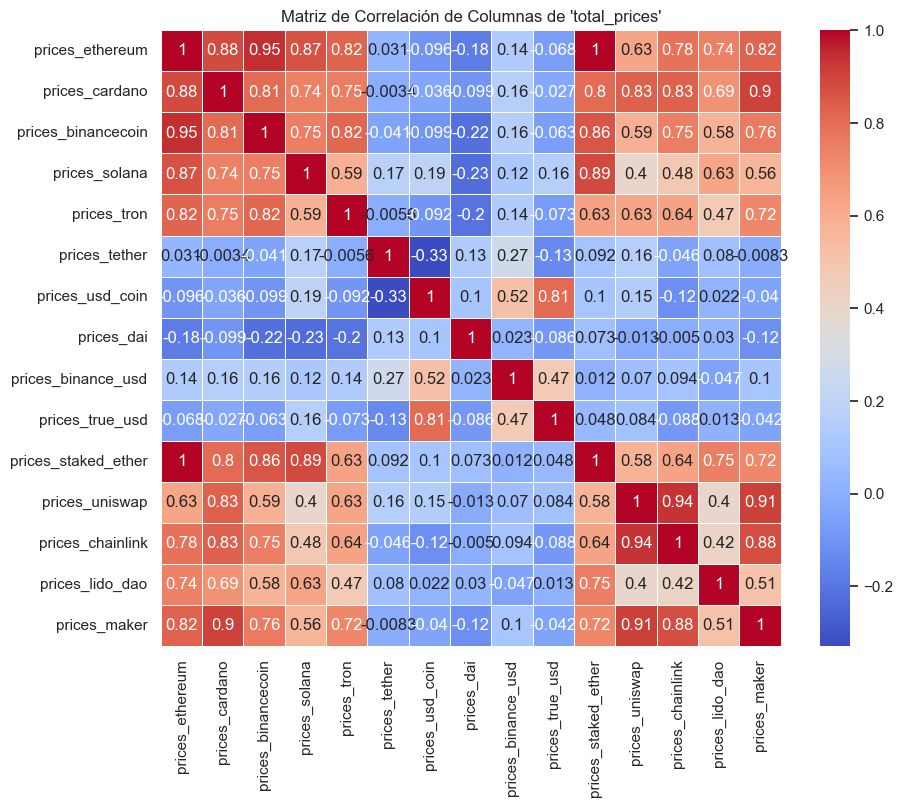

In [42]:
correlation_prices = merged_df.filter(like='prices').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_prices, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'total_prices'")
plt.show()

In [43]:
def cambiar_fechas(unix_timestamp):
    formatted_date = datetime.fromtimestamp(unix_timestamp / 1000).strftime('%Y-%m-%d %H:%M')
    return formatted_date

Se extraen las criptomonedas por categorias con datos de 'open', 'high', 'low' y 'close'
<h2>Plataforma de Contrato Inteligente</h2>

In [44]:
# Smart Contract Platform Coin
df_ethereum_prices = cg.get_coin_ohlc_by_id(id='ethereum',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_ethereum_prices = pd.DataFrame(df_ethereum_prices, columns=columns)
df_ethereum_prices['date'] = df_ethereum_prices['date'].apply(cambiar_fechas)
df_ethereum_prices['id'] = 'ethereum'
df_ethereum_prices['symbol'] = 'eth'
# df_ethereum_prices.to_csv('ethereum_prices.csv', index=False)
print(df_ethereum_prices)

print(df_ethereum_prices.isnull().sum())

                 date        open        high         low       close  \
0    2015-08-07 02:00    2.830000    2.830000    2.830000    2.830000   
1    2015-08-11 02:00    1.330000    1.330000    0.687586    1.067000   
2    2015-08-15 02:00    1.260000    1.830000    1.260000    1.670000   
3    2015-08-19 02:00    1.480000    1.480000    1.200000    1.250000   
4    2015-08-23 02:00    1.480000    1.480000    1.360000    1.360000   
..                ...         ...         ...         ...         ...   
761  2023-08-03 02:00 1857.280000 1869.750000 1838.010000 1838.010000   
762  2023-08-07 02:00 1835.700000 1835.700000 1826.710000 1826.710000   
763  2023-08-11 02:00 1826.930000 1856.840000 1826.930000 1850.880000   
764  2023-08-15 02:00 1847.540000 1848.510000 1839.510000 1843.510000   
765  2023-08-19 02:00 1826.910000 1826.910000 1826.910000 1826.910000   

           id symbol  
0    ethereum    eth  
1    ethereum    eth  
2    ethereum    eth  
3    ethereum    eth  
4    eth

In [45]:
# Smart Contract Platform Coin
df_cardano_prices = cg.get_coin_ohlc_by_id(id='cardano',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_cardano_prices = pd.DataFrame(df_cardano_prices, columns=columns)
df_cardano_prices['date'] = df_cardano_prices['date'].apply(cambiar_fechas)
df_cardano_prices['id'] = 'cardano'
df_cardano_prices['symbol'] = 'ada'
# df_cardano_prices.to_csv('cardano_prices.csv', index=False)
print(df_cardano_prices)

print(df_cardano_prices.isnull().sum())

                 date     open     high      low    close       id symbol
0    2017-10-19 02:00 0.026845 0.026845 0.026830 0.026830  cardano    ada
1    2017-10-23 02:00 0.030300 0.030300 0.026045 0.026045  cardano    ada
2    2017-10-27 02:00 0.027417 0.027417 0.026510 0.026510  cardano    ada
3    2017-10-31 01:00 0.025976 0.030251 0.025976 0.030251  cardano    ada
4    2017-11-03 01:00 0.023096 0.023096 0.021321 0.022789  cardano    ada
..                ...      ...      ...      ...      ...      ...    ...
551  2023-08-03 02:00 0.307346 0.309375 0.299005 0.299005  cardano    ada
552  2023-08-07 02:00 0.292438 0.293599 0.291698 0.291698  cardano    ada
553  2023-08-11 02:00 0.290181 0.301206 0.290181 0.296027  cardano    ada
554  2023-08-15 02:00 0.293325 0.293325 0.289372 0.290452  cardano    ada
555  2023-08-19 02:00 0.281729 0.281729 0.281729 0.281729  cardano    ada

[556 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symbol    0
dtyp

In [46]:
# Smart Contract Platform Coin
df_binancecoin_prices = cg.get_coin_ohlc_by_id(id='binancecoin',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_binancecoin_prices = pd.DataFrame(df_binancecoin_prices, columns=columns)
df_binancecoin_prices['date'] = df_binancecoin_prices['date'].apply(cambiar_fechas)
df_binancecoin_prices['id'] = 'binancecoin'
df_binancecoin_prices['symbol'] = 'bnb'
# df_binancecoin_prices.to_csv('binancecoin_prices.csv', index=False)
print(df_binancecoin_prices)

print(df_binancecoin_prices.isnull().sum())

                 date       open       high        low      close  \
0    2017-09-19 02:00   0.107251   0.173491   0.107251   0.168334   
1    2017-09-23 02:00   0.166628   0.166628   0.088290   0.088290   
2    2017-09-27 02:00   0.085455   0.115055   0.085455   0.115055   
3    2017-09-30 02:00   0.139552   0.171912   0.132173   0.171912   
4    2017-10-03 02:00   0.101168   0.124432   0.101168   0.124432   
..                ...        ...        ...        ...        ...   
559  2023-08-03 02:00 241.190000 247.430000 240.380000 240.380000   
560  2023-08-07 02:00 241.140000 242.880000 241.140000 242.570000   
561  2023-08-11 02:00 241.740000 245.180000 241.230000 241.230000   
562  2023-08-15 02:00 239.600000 240.360000 239.600000 240.360000   
563  2023-08-19 02:00 236.610000 236.610000 236.610000 236.610000   

              id symbol  
0    binancecoin    bnb  
1    binancecoin    bnb  
2    binancecoin    bnb  
3    binancecoin    bnb  
4    binancecoin    bnb  
..           ..

In [47]:
# Smart Contract Platform Coin
df_solana_prices = cg.get_coin_ohlc_by_id(id='solana',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_solana_prices = pd.DataFrame(df_solana_prices, columns=columns)
df_solana_prices['date'] = df_solana_prices['date'].apply(cambiar_fechas)
df_solana_prices['id'] = 'solana'
df_solana_prices['symbol'] = 'sol'
# df_solana_prices.to_csv('solana_prices.csv', index=False)
print(df_solana_prices)

print(df_solana_prices.isnull().sum())

                 date      open      high       low     close      id symbol
0    2020-04-11 02:00  0.957606  0.957606  0.957606  0.957606  solana    sol
1    2020-04-15 02:00  0.784711  0.875994  0.666673  0.666673  solana    sol
2    2020-04-19 02:00  0.637621  0.692333  0.637621  0.676972  solana    sol
3    2020-04-23 02:00  0.609436  0.684887  0.534790  0.684887  solana    sol
4    2020-04-27 02:00  0.621703  0.647090  0.621703  0.639863  solana    sol
..                ...       ...       ...       ...       ...     ...    ...
315  2023-08-03 02:00 23.760000 23.930000 23.130000 23.130000  solana    sol
316  2023-08-07 02:00 22.650000 23.160000 22.630000 23.160000  solana    sol
317  2023-08-11 02:00 23.050000 24.620000 23.050000 24.620000  solana    sol
318  2023-08-15 02:00 24.580000 25.150000 24.220000 25.150000  solana    sol
319  2023-08-19 02:00 23.880000 23.880000 23.880000 23.880000  solana    sol

[320 rows x 7 columns]
date      0
open      0
high      0
low       0
clos

In [48]:
# Smart Contract Platform Coin
df_tron_prices = cg.get_coin_ohlc_by_id(id='tron',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_tron_prices = pd.DataFrame(df_tron_prices, columns=columns)
df_tron_prices['date'] = df_tron_prices['date'].apply(cambiar_fechas)
df_tron_prices['id'] = 'tron'
df_tron_prices['symbol'] = 'trx'
# df_tron_prices.to_csv('tron_prices.csv', index=False)
print(df_tron_prices)

print(df_tron_prices.isnull().sum())

                 date     open     high      low    close    id symbol
0    2017-11-11 01:00 0.002387 0.002387 0.001915 0.001915  tron    trx
1    2017-11-15 01:00 0.001804 0.002415 0.001804 0.002320  tron    trx
2    2017-11-19 01:00 0.002248 0.002248 0.001985 0.001985  tron    trx
3    2017-11-23 01:00 0.002133 0.002333 0.002130 0.002138  tron    trx
4    2017-11-27 01:00 0.002071 0.002114 0.002015 0.002090  tron    trx
..                ...      ...      ...      ...      ...   ...    ...
545  2023-08-03 02:00 0.077981 0.078591 0.076455 0.076455  tron    trx
546  2023-08-07 02:00 0.077196 0.077452 0.076729 0.076817  tron    trx
547  2023-08-11 02:00 0.076751 0.077265 0.076728 0.077265  tron    trx
548  2023-08-15 02:00 0.077129 0.077442 0.077098 0.077408  tron    trx
549  2023-08-19 02:00 0.076247 0.076247 0.076247 0.076247  tron    trx

[550 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symbol    0
dtype: int64


<h2>Monedas Estables</h2>

In [49]:
# Stable Coin
df_tether_prices = cg.get_coin_ohlc_by_id(id='tether',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_tether_prices = pd.DataFrame(df_tether_prices, columns=columns)
df_tether_prices['date'] = df_tether_prices['date'].apply(cambiar_fechas)
df_tether_prices['id'] = 'tether'
df_tether_prices['symbol'] = 'usdt'
# df_tether_prices.to_csv('tether_prices.csv', index=False)
print(df_tether_prices)

print(df_tether_prices.isnull().sum())

                 date     open     high      low    close      id symbol
0    2015-02-27 01:00 1.210000 1.210000 1.210000 1.210000  tether   usdt
1    2015-03-03 01:00 0.572521 0.572521 0.572521 0.572521  tether   usdt
2    2015-03-07 01:00 1.000000 1.000000 1.000000 1.000000  tether   usdt
3    2015-03-11 01:00 1.000000 1.000000 1.000000 1.000000  tether   usdt
4    2015-03-15 01:00 1.000000 1.000000 1.000000 1.000000  tether   usdt
..                ...      ...      ...      ...      ...     ...    ...
801  2023-08-03 02:00 0.999867 0.999942 0.999242 0.999242  tether   usdt
802  2023-08-07 02:00 0.998680 0.998987 0.998320 0.998320  tether   usdt
803  2023-08-11 02:00 0.998873 0.999945 0.998873 0.998899  tether   usdt
804  2023-08-15 02:00 0.998938 0.999384 0.998713 0.998713  tether   usdt
805  2023-08-19 02:00 0.998893 0.998893 0.998893 0.998893  tether   usdt

[806 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symbol    0
dtype: int64


In [50]:
df_tether_prices = df_tether_prices.iloc[2:].reset_index(drop=True)
# df_tether_prices.to_csv('tether_prices.csv', index=False)
df_tether_prices

,date,open,high,low,close,id,symbol
0,2015-03-07 01:00,1.000000,1.000000,1.000000,1.000000,tether,usdt
1,2015-03-11 01:00,1.000000,1.000000,1.000000,1.000000,tether,usdt
2,2015-03-15 01:00,1.000000,1.000000,1.000000,1.000000,tether,usdt
3,2015-03-19 01:00,1.000000,1.000000,1.000000,1.000000,tether,usdt
4,2015-03-23 01:00,1.000000,1.000000,1.000000,1.000000,tether,usdt
...,...,...,...,...,...,...,...
799,2023-08-03 02:00,0.999867,0.999942,0.999242,0.999242,tether,usdt
800,2023-08-07 02:00,0.998680,0.998987,0.998320,0.998320,tether,usdt
801,2023-08-11 02:00,0.998873,0.999945,0.998873,0.998899,tether,usdt
802,2023-08-15 02:00,0.998938,0.999384,0.998713,0.998713,tether,usdt


In [51]:
# Stable Coin
df_usd_coin_prices = cg.get_coin_ohlc_by_id(id='usd-coin',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_usd_coin_prices = pd.DataFrame(df_usd_coin_prices, columns=columns)
df_usd_coin_prices['date'] = df_usd_coin_prices['date'].apply(cambiar_fechas)
df_usd_coin_prices['id'] = 'usd-coin'
df_usd_coin_prices['symbol'] = 'usdc'
# df_usd_coin_prices.to_csv('usd_coin_prices.csv', index=False)
print(df_usd_coin_prices)

print(df_usd_coin_prices.isnull().sum())

                 date     open     high      low    close        id symbol
0    2018-10-07 02:00 1.006000 1.006000 1.001000 1.001000  usd-coin   usdc
1    2018-10-11 02:00 1.002000 1.002000 0.997793 0.997793  usd-coin   usdc
2    2018-10-15 02:00 1.008000 1.025000 1.008000 1.025000  usd-coin   usdc
3    2018-10-19 02:00 1.038000 1.039000 1.019000 1.019000  usd-coin   usdc
4    2018-10-23 02:00 1.016000 1.035000 1.016000 1.020000  usd-coin   usdc
..                ...      ...      ...      ...      ...       ...    ...
459  2023-08-03 02:00 1.000000 1.003000 0.999738 0.999738  usd-coin   usdc
460  2023-08-07 02:00 0.999629 1.000000 0.999629 0.999814  usd-coin   usdc
461  2023-08-11 02:00 1.000000 1.000000 0.999861 0.999861  usd-coin   usdc
462  2023-08-15 02:00 1.000000 1.000000 0.999688 0.999688  usd-coin   usdc
463  2023-08-19 02:00 0.999975 0.999975 0.999975 0.999975  usd-coin   usdc

[464 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symb

In [52]:
# Stable Coin
df_dai_prices = cg.get_coin_ohlc_by_id(id='dai',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_dai_prices = pd.DataFrame(df_dai_prices, columns=columns)
df_dai_prices['date'] = df_dai_prices['date'].apply(cambiar_fechas)
df_dai_prices['id'] = 'dai'
df_dai_prices['symbol'] = 'dai'
# df_dai_prices.to_csv('dai_prices.csv', index=False)
print(df_dai_prices)

print(df_dai_prices.isnull().sum())

                 date     open     high      low    close   id symbol
0    2019-11-19 01:00 1.001000 1.001000 1.001000 1.001000  dai    dai
1    2019-11-23 01:00 0.995411 0.995411 0.991102 0.992850  dai    dai
2    2019-11-27 01:00 0.982120 0.988811 0.927536 0.947704  dai    dai
3    2019-11-30 01:00 0.979753 0.982380 0.973684 0.982380  dai    dai
4    2019-12-03 01:00 0.947958 0.993172 0.947958 0.993172  dai    dai
..                ...      ...      ...      ...      ...  ...    ...
353  2023-08-03 02:00 1.001000 1.001000 0.999104 0.999104  dai    dai
354  2023-08-07 02:00 1.000000 1.001000 0.999870 0.999870  dai    dai
355  2023-08-11 02:00 0.999635 1.000000 0.999635 0.999738  dai    dai
356  2023-08-15 02:00 0.999725 1.000000 0.999725 0.999849  dai    dai
357  2023-08-19 02:00 0.999731 0.999731 0.999731 0.999731  dai    dai

[358 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symbol    0
dtype: int64


In [53]:
# Stable Coin
df_binance_usd_prices = cg.get_coin_ohlc_by_id(id='binance-usd',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_binance_usd_prices = pd.DataFrame(df_binance_usd_prices, columns=columns)
df_binance_usd_prices['date'] = df_binance_usd_prices['date'].apply(cambiar_fechas)
df_binance_usd_prices['id'] = 'binance-usd'
df_binance_usd_prices['symbol'] = 'busd'
# df_binance_usd_prices.to_csv('binance_usd_prices.csv', index=False)
print(df_binance_usd_prices)

print(df_binance_usd_prices.isnull().sum())

                 date     open     high      low    close           id symbol
0    2019-09-23 02:00 1.000000 1.001000 0.999807 0.999807  binance-usd   busd
1    2019-09-27 02:00 0.999933 1.002000 0.999933 1.000000  binance-usd   busd
2    2019-09-30 02:00 1.001000 1.003000 0.997239 0.997239  binance-usd   busd
3    2019-10-03 02:00 1.000000 1.003000 1.000000 1.003000  binance-usd   busd
4    2019-10-07 02:00 1.000000 1.000000 0.998739 0.998739  binance-usd   busd
..                ...      ...      ...      ...      ...          ...    ...
368  2023-08-03 02:00 0.999871 1.002000 0.999871 1.000000  binance-usd   busd
369  2023-08-07 02:00 0.999279 1.001000 0.999279 0.999311  binance-usd   busd
370  2023-08-11 02:00 1.001000 1.001000 0.999862 0.999957  binance-usd   busd
371  2023-08-15 02:00 0.999997 0.999997 0.999262 0.999895  binance-usd   busd
372  2023-08-19 02:00 0.999627 0.999627 0.999627 0.999627  binance-usd   busd

[373 rows x 7 columns]
date      0
open      0
high      0
low 

In [54]:
# Stable Coin
df_true_usd_prices = cg.get_coin_ohlc_by_id(id='true-usd',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_true_usd_prices = pd.DataFrame(df_true_usd_prices, columns=columns)
df_true_usd_prices['date'] = df_true_usd_prices['date'].apply(cambiar_fechas)
df_true_usd_prices['id'] = 'true-usd'
df_true_usd_prices['symbol'] = 'tusd'
# df_true_usd_prices.to_csv('true_usd_prices.csv', index=False)
print(df_true_usd_prices)

print(df_true_usd_prices.isnull().sum())

                 date     open     high      low    close        id symbol
0    2018-03-23 01:00 1.006000 1.006000 1.006000 1.006000  true-usd   tusd
1    2018-03-27 02:00 0.998446 0.999969 0.989117 0.999969  true-usd   tusd
2    2018-03-31 02:00 1.002000 1.013000 0.994966 1.013000  true-usd   tusd
3    2018-04-03 02:00 1.008000 1.012000 1.004000 1.004000  true-usd   tusd
4    2018-04-07 02:00 1.001000 1.016000 1.001000 1.012000  true-usd   tusd
..                ...      ...      ...      ...      ...       ...    ...
511  2023-08-03 02:00 0.997942 1.002000 0.997942 0.999796  true-usd   tusd
512  2023-08-07 02:00 0.999487 1.000000 0.998733 0.998733  true-usd   tusd
513  2023-08-11 02:00 1.000000 1.000000 0.998915 0.998915  true-usd   tusd
514  2023-08-15 02:00 0.999301 0.999462 0.998380 0.998380  true-usd   tusd
515  2023-08-19 02:00 0.999126 0.999126 0.999126 0.999126  true-usd   tusd

[516 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symb

<h2>Finanzas Descentralizadas</h2>

In [55]:
# Decentralized Finance Coin
df_staked_ether_prices = cg.get_coin_ohlc_by_id(id='staked-ether',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_staked_ether_prices = pd.DataFrame(df_staked_ether_prices, columns=columns)
df_staked_ether_prices['date'] = df_staked_ether_prices['date'].apply(cambiar_fechas)
df_staked_ether_prices['id'] = 'staked-ether'
df_staked_ether_prices['symbol'] = 'steth'
# df_staked_ether_prices.to_csv('staked_ether_prices.csv', index=False)
print(df_staked_ether_prices)

print(df_staked_ether_prices.isnull().sum())

                 date        open        high         low       close  \
0    2020-12-23 01:00  617.160000  617.160000  617.160000  617.160000   
1    2020-12-27 01:00  596.770000  629.070000  596.770000  629.070000   
2    2020-12-31 01:00  678.100000  730.420000  678.100000  722.280000   
3    2021-01-03 01:00  733.320000  772.060000  723.530000  772.060000   
4    2021-01-07 01:00  977.570000 1173.330000  966.900000 1173.330000   
..                ...         ...         ...         ...         ...   
248  2023-08-03 02:00 1857.550000 1879.220000 1836.060000 1836.060000   
249  2023-08-07 02:00 1835.270000 1835.270000 1826.240000 1826.240000   
250  2023-08-11 02:00 1821.720000 1856.800000 1821.720000 1849.450000   
251  2023-08-15 02:00 1846.300000 1846.710000 1837.910000 1842.550000   
252  2023-08-19 02:00 1826.360000 1826.360000 1826.360000 1826.360000   

               id symbol  
0    staked-ether  steth  
1    staked-ether  steth  
2    staked-ether  steth  
3    staked-eth

In [56]:
# Decentralized Finance Coin
df_uniswap_prices = cg.get_coin_ohlc_by_id(id='uniswap',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_uniswap_prices = pd.DataFrame(df_uniswap_prices, columns=columns)
df_uniswap_prices['date'] = df_uniswap_prices['date'].apply(cambiar_fechas)
df_uniswap_prices['id'] = 'uniswap'
df_uniswap_prices['symbol'] = 'uni'
# df_uniswap_prices.to_csv('uniswap_prices.csv', index=False)
print(df_uniswap_prices)

print(df_uniswap_prices.isnull().sum())

                 date     open     high      low    close       id symbol
0    2020-09-19 02:00 3.440000 7.100000 3.440000 7.100000  uniswap    uni
1    2020-09-23 02:00 5.700000 5.700000 3.910000 3.910000  uniswap    uni
2    2020-09-27 02:00 4.340000 5.140000 4.340000 4.870000  uniswap    uni
3    2020-09-30 02:00 4.840000 4.840000 4.250000 4.340000  uniswap    uni
4    2020-10-03 02:00 4.150000 4.240000 3.900000 3.900000  uniswap    uni
..                ...      ...      ...      ...      ...      ...    ...
273  2023-08-03 02:00 6.540000 6.670000 6.150000 6.150000  uniswap    uni
274  2023-08-07 02:00 6.100000 6.100000 5.940000 5.940000  uniswap    uni
275  2023-08-11 02:00 5.860000 6.270000 5.860000 6.190000  uniswap    uni
276  2023-08-15 02:00 6.180000 6.260000 6.090000 6.260000  uniswap    uni
277  2023-08-19 02:00 5.960000 5.960000 5.960000 5.960000  uniswap    uni

[278 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symbol    0
dtyp

In [57]:
# Decentralized Finance Coin
df_chainlink_prices = cg.get_coin_ohlc_by_id(id='chainlink',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_chainlink_prices = pd.DataFrame(df_chainlink_prices, columns=columns)
df_chainlink_prices['date'] = df_chainlink_prices['date'].apply(cambiar_fechas)
df_chainlink_prices['id'] = 'chainlink'
df_chainlink_prices['symbol'] = 'link'
# df_chainlink_prices.to_csv('chainlink_prices.csv', index=False)
print(df_chainlink_prices)

print(df_chainlink_prices.isnull().sum())

                 date     open     high      low    close         id symbol
0    2017-11-11 01:00 0.225377 0.225377 0.181223 0.181223  chainlink   link
1    2017-11-15 01:00 0.170013 0.190235 0.170013 0.190235  chainlink   link
2    2017-11-19 01:00 0.168815 0.170397 0.157112 0.161562  chainlink   link
3    2017-11-23 01:00 0.161699 0.171995 0.155340 0.166836  chainlink   link
4    2017-11-27 01:00 0.193630 0.193630 0.180970 0.185539  chainlink   link
..                ...      ...      ...      ...      ...        ...    ...
545  2023-08-03 02:00 7.550000 7.640000 7.340000 7.340000  chainlink   link
546  2023-08-07 02:00 7.130000 7.220000 7.090000 7.090000  chainlink   link
547  2023-08-11 02:00 7.280000 7.700000 7.280000 7.610000  chainlink   link
548  2023-08-15 02:00 7.480000 7.480000 7.370000 7.410000  chainlink   link
549  2023-08-19 02:00 7.040000 7.040000 7.040000 7.040000  chainlink   link

[550 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id  

In [58]:
# Decentralized Finance Coin
df_lido_dao_prices = cg.get_coin_ohlc_by_id(id='lido-dao',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_lido_dao_prices = pd.DataFrame(df_lido_dao_prices, columns=columns)
df_lido_dao_prices['date'] = df_lido_dao_prices['date'].apply(cambiar_fechas)
df_lido_dao_prices['id'] = 'lido-dao'
df_lido_dao_prices['symbol'] = 'ldo'
# df_lido_dao_prices.to_csv('lido_dao_prices.csv', index=False)
print(df_lido_dao_prices)

print(df_lido_dao_prices.isnull().sum())

                 date     open     high      low    close        id symbol
0    2021-01-07 01:00 1.750000 1.760000 1.750000 1.760000  lido-dao    ldo
1    2021-01-11 01:00 1.430000 1.500000 0.844958 0.995485  lido-dao    ldo
2    2021-01-15 01:00 0.893161 1.077000 0.830178 1.077000  lido-dao    ldo
3    2021-01-19 01:00 0.953457 0.953457 0.775847 0.791141  lido-dao    ldo
4    2021-01-23 01:00 0.871244 0.871244 0.613063 0.633390  lido-dao    ldo
..                ...      ...      ...      ...      ...       ...    ...
244  2023-08-03 02:00 1.850000 1.940000 1.850000 1.850000  lido-dao    ldo
245  2023-08-07 02:00 1.870000 1.870000 1.830000 1.830000  lido-dao    ldo
246  2023-08-11 02:00 1.840000 1.890000 1.840000 1.860000  lido-dao    ldo
247  2023-08-15 02:00 1.860000 1.860000 1.820000 1.840000  lido-dao    ldo
248  2023-08-19 02:00 1.730000 1.730000 1.730000 1.730000  lido-dao    ldo

[249 rows x 7 columns]
date      0
open      0
high      0
low       0
close     0
id        0
symb

In [59]:
# Decentralized Finance Coin
df_maker_prices = cg.get_coin_ohlc_by_id(id='maker',vs_currency='usd',days='max')
columns = ['date', 'open', 'high', 'low', 'close']
df_maker_prices = pd.DataFrame(df_maker_prices, columns=columns)
df_maker_prices['date'] = df_maker_prices['date'].apply(cambiar_fechas)
df_maker_prices['id'] = 'maker'
df_maker_prices['symbol'] = 'mkr'
# df_maker_prices.to_csv('maker_prices.csv', index=False)
print(df_maker_prices)

print(df_maker_prices.isnull().sum())

                 date        open        high         low       close     id  \
0    2017-12-23 01:00 1089.370000 1514.260000  873.830000 1042.820000  maker   
1    2017-12-27 01:00 1240.930000 1581.330000 1148.860000 1148.860000  maker   
2    2017-12-31 01:00 1073.750000 1079.060000 1009.360000 1009.360000  maker   
3    2018-01-03 01:00 1090.010000 1152.970000 1090.010000 1152.970000  maker   
4    2018-01-07 01:00 1021.210000 1466.650000 1021.210000 1466.650000  maker   
..                ...         ...         ...         ...         ...    ...   
534  2023-08-03 02:00 1226.680000 1336.960000 1226.680000 1291.410000  maker   
535  2023-08-07 02:00 1288.980000 1300.530000 1219.590000 1219.590000  maker   
536  2023-08-11 02:00 1215.610000 1254.450000 1211.990000 1254.450000  maker   
537  2023-08-15 02:00 1248.590000 1249.250000 1223.480000 1249.250000  maker   
538  2023-08-19 02:00 1233.290000 1233.290000 1233.290000 1233.290000  maker   

    symbol  
0      mkr  
1      mkr  


Graficamos todas los DataFrames a través de la columna 'price' para identificar su movimiento en el tiempo

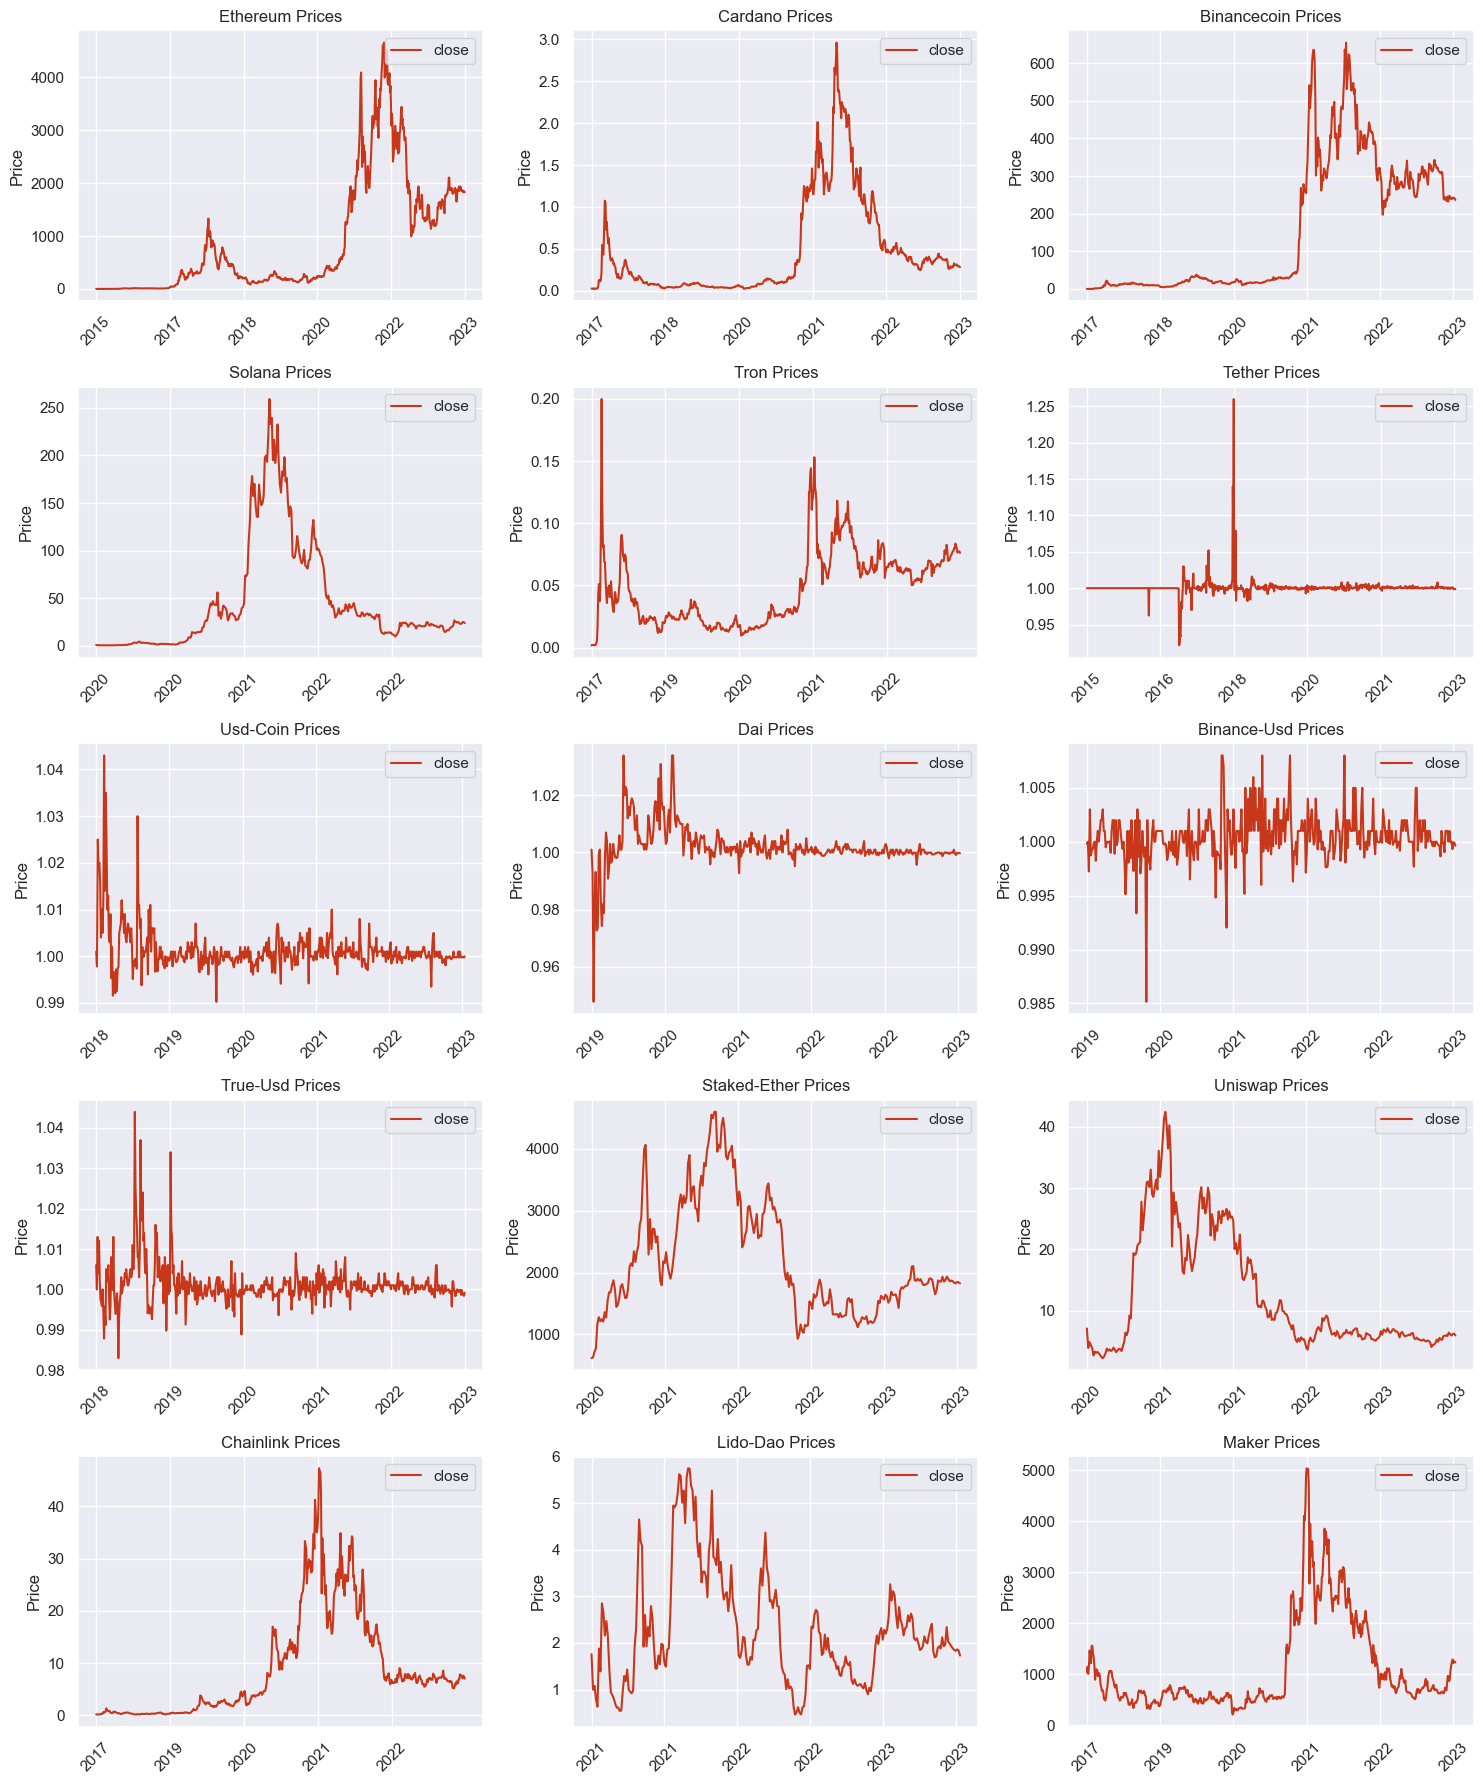

In [60]:
nrow = 5
ncol = 3

df_dict = {
    'Ethereum Prices': df_ethereum_prices,
    'Cardano Prices': df_cardano_prices,
    'Binancecoin Prices': df_binancecoin_prices,
    'Solana Prices': df_solana_prices,
    'Tron Prices': df_tron_prices,
    'Tether Prices': df_tether_prices,
    'Usd-Coin Prices': df_usd_coin_prices,
    'Dai Prices': df_dai_prices,
    'Binance-Usd Prices': df_binance_usd_prices,
    'True-Usd Prices': df_true_usd_prices,
    'Staked-Ether Prices': df_staked_ether_prices,
    'Uniswap Prices': df_uniswap_prices,
    'Chainlink Prices': df_chainlink_prices,
    'Lido-Dao Prices': df_lido_dao_prices,
    'Maker Prices': df_maker_prices
}

for df_name, df in df_dict.items():
    df['date'] = pd.to_datetime(df['date'])

color = ['#c9371a']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 18))
count = 0

for r in range(nrow):
    for c in range(ncol):
        if count < len(df_dict):  # Ensure we have more dataframes to plot
            df_name = list(df_dict.keys())[count]  # Get the name of the current dataframe
            df = df_dict[df_name]
            ax = df['close'].plot(ax=axes[r, c], color=color)  # Plot the 'close' column
            axes[r, c].set_title(f'{df_name}')  # Use the dataframe name as the title
            axes[r, c].set_xticks(range(0, len(df), len(df)//5))  # Customize x-axis tick positions
            axes[r, c].set_xticklabels(df['date'][::len(df)//5].dt.year, rotation=45)   # Customize x-axis tick labels
            axes[r, c].set_ylabel('Price')
            ax.legend(loc='upper right')
            count += 1
        else:
            axes[r, c].axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()

Por ultimo únimos cada DataFrame entre sí para poder exportarlo a PowerBI

In [61]:
def rename_columns(df, suffix):
    for col in df.columns:
        if col != 'date':
            df.rename(columns={col: col + suffix}, inplace=True)

# Renombrar columnas de cada DataFrame
rename_columns(df_ethereum_prices, '_ethereum')
rename_columns(df_cardano_prices, '_cardano')
rename_columns(df_binancecoin_prices, '_binancecoin')
rename_columns(df_solana_prices, '_solana')
rename_columns(df_tron_prices, '_tron')
rename_columns(df_tether_prices, '_tether')
rename_columns(df_usd_coin_prices, '_usd_coin')
rename_columns(df_dai_prices, '_dai')
rename_columns(df_binance_usd_prices, '_binance_usd')
rename_columns(df_true_usd_prices, '_true_usd')
rename_columns(df_staked_ether_prices, '_staked_ether')
rename_columns(df_uniswap_prices, '_uniswap')
rename_columns(df_chainlink_prices, '_chainlink')
rename_columns(df_lido_dao_prices, '_lido_dao')
rename_columns(df_maker_prices, '_maker')

In [62]:
merged_df_prices = df_ethereum_prices.merge(df_cardano_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_binancecoin_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_solana_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_tron_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_tether_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_usd_coin_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_dai_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_binance_usd_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_true_usd_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_staked_ether_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_uniswap_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_chainlink_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_lido_dao_prices, on='date', how='outer')
merged_df_prices = merged_df_prices.merge(df_maker_prices, on='date', how='outer')

In [63]:
merged_df_prices.drop_duplicates(subset='date', inplace=True)
merged_df_prices = merged_df_prices.sort_values(by='date')
merged_df_prices.reset_index(drop=True, inplace=True)
# merged_df_prices.to_csv('merged_prices.csv', index=False)
merged_df_prices

,date,open_ethereum,high_ethereum,low_ethereum,close_ethereum,id_ethereum,symbol_ethereum,open_cardano,high_cardano,low_cardano,...,low_lido_dao,close_lido_dao,id_lido_dao,symbol_lido_dao,open_maker,high_maker,low_maker,close_maker,id_maker,symbol_maker
0,2015-03-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-15 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-03-23 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2023-08-03 02:00:00,1857.280000,1869.750000,1838.010000,1838.010000,ethereum,eth,0.307346,0.309375,0.299005,...,1.850000,1.850000,lido-dao,ldo,1226.680000,1336.960000,1226.680000,1291.410000,maker,mkr
802,2023-08-07 02:00:00,1835.700000,1835.700000,1826.710000,1826.710000,ethereum,eth,0.292438,0.293599,0.291698,...,1.830000,1.830000,lido-dao,ldo,1288.980000,1300.530000,1219.590000,1219.590000,maker,mkr
803,2023-08-11 02:00:00,1826.930000,1856.840000,1826.930000,1850.880000,ethereum,eth,0.290181,0.301206,0.290181,...,1.840000,1.860000,lido-dao,ldo,1215.610000,1254.450000,1211.990000,1254.450000,maker,mkr
804,2023-08-15 02:00:00,1847.540000,1848.510000,1839.510000,1843.510000,ethereum,eth,0.293325,0.293325,0.289372,...,1.820000,1.840000,lido-dao,ldo,1248.590000,1249.250000,1223.480000,1249.250000,maker,mkr


In [64]:
df_ethereum['date_only'] = df_ethereum['date'].dt.date
df_ethereum_prices['date_only'] = df_ethereum_prices['date'].dt.date
ethereum_combinado = pd.merge(df_ethereum, df_ethereum_prices, on='date_only', how='outer')
ethereum_combinado = pd.DataFrame(ethereum_combinado)


ethereum_combinado = ethereum_combinado.rename(columns={
    'date_x': 'date',
    'id_ethereum_x': 'id',
    'symbol_ethereum_x': 'symbol',
    'open_ethereum': 'open',
    'high_ethereum': 'high',
    'low_ethereum': 'low',
    'close_ethereum': 'close',
    'prices_ethereum': 'prices',
    'market_caps_ethereum': 'market_caps',
    'total_volumes_ethereum': 'total_volumes'
})
columns_to_drop = ['id_ethereum_y', 'symbol_ethereum_y', 'date_only', 'date_y']
ethereum_combinado = ethereum_combinado.drop(columns=columns_to_drop)
# ethereum_combinado.to_csv('ethereum_combinado.csv', index=False)
ethereum_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2015-08-07,2.831620,0.000000,90622.000000,ethereum,eth,2.830000,2.830000,2.830000,2.830000
1,2015-08-08,1.330750,80339475.000000,368070.000000,ethereum,eth,NaN,NaN,NaN,NaN
2,2015-08-10,0.687586,41556309.211122,400464.074544,ethereum,eth,NaN,NaN,NaN,NaN
3,2015-08-11,1.067379,64539006.306272,1518998.205337,ethereum,eth,1.330000,1.330000,0.687586,1.067000
4,2015-08-12,1.256613,76013261.054154,2073893.345031,ethereum,eth,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2928,2023-08-14,1839.512810,220948326523.333557,3642424563.740612,ethereum,eth,NaN,NaN,NaN,NaN
2929,2023-08-15,1843.513391,221564238004.308777,4495324729.871393,ethereum,eth,1847.540000,1848.510000,1839.510000,1843.510000
2930,2023-08-16,1826.913128,219472776850.511780,4416612452.114058,ethereum,eth,NaN,NaN,NaN,NaN
2931,2023-08-16,1823.182113,218989555752.517181,4845723846.567491,ethereum,eth,NaN,NaN,NaN,NaN


In [65]:
df_cardano['date'] = pd.to_datetime(df_cardano['date'])
df_cardano_prices['date'] = pd.to_datetime(df_cardano_prices['date'])
df_cardano['date_only'] = df_cardano['date'].dt.date
df_cardano_prices['date_only'] = df_cardano_prices['date'].dt.date
cardano_combinado = pd.merge(df_cardano, df_cardano_prices, on='date_only', how='outer')
cardano_combinado = pd.DataFrame(cardano_combinado)

cardano_combinado = cardano_combinado.rename(columns={
    'date_x': 'date',
    'id_cardano_x': 'id',
    'symbol_cardano_x': 'symbol',
    'open_cardano': 'open',
    'high_cardano': 'high',
    'low_cardano': 'low',
    'close_cardano': 'close',
    'prices_cardano': 'prices',
    'market_caps_cardano': 'market_caps',
    'total_volumes_cardano': 'total_volumes'
})
columns_to_drop = ['id_cardano_y', 'symbol_cardano_y', 'date_only', 'date_y']
cardano_combinado = cardano_combinado.drop(columns=columns_to_drop)
# cardano_combinado.to_csv('cardano_combinado.csv', index=False)
cardano_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2017-10-18,0.026845,696021404.307960,2351678.122306,cardano,ada,NaN,NaN,NaN,NaN
1,2017-10-19,0.026830,695622018.255994,2815155.969600,cardano,ada,0.026845,0.026845,0.026830,0.026830
2,2017-10-20,0.030300,785580027.642410,8883473.082063,cardano,ada,NaN,NaN,NaN,NaN
3,2017-10-21,0.028588,741202123.879770,5308856.917096,cardano,ada,NaN,NaN,NaN,NaN
4,2017-10-22,0.027796,720669848.472413,2901876.122086,cardano,ada,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2126,2023-08-14,0.289372,10135047904.827347,125106297.155349,cardano,ada,NaN,NaN,NaN,NaN
2127,2023-08-15,0.290452,10181963472.170074,129874470.395376,cardano,ada,0.293325,0.293325,0.289372,0.290452
2128,2023-08-16,0.281729,9874705133.518471,174122704.034539,cardano,ada,NaN,NaN,NaN,NaN
2129,2023-08-16,0.281741,9879384212.952820,185451956.591442,cardano,ada,NaN,NaN,NaN,NaN


In [66]:
df_binancecoin['date'] = pd.to_datetime(df_binancecoin['date'])
df_binancecoin_prices['date'] = pd.to_datetime(df_binancecoin_prices['date'])
df_binancecoin['date_only'] = df_binancecoin['date'].dt.date
df_binancecoin_prices['date_only'] = df_binancecoin_prices['date'].dt.date
binancecoin_combinado = pd.merge(df_binancecoin, df_binancecoin_prices, on='date_only', how='outer')
binancecoin_combinado = pd.DataFrame(binancecoin_combinado)

binancecoin_combinado = binancecoin_combinado.rename(columns={
    'date_x': 'date',
    'id_binancecoin_x': 'id',
    'symbol_binancecoin_x': 'symbol',
    'open_binancecoin': 'open',
    'high_binancecoin': 'high',
    'low_binancecoin': 'low',
    'close_binancecoin': 'close',
    'prices_binancecoin': 'prices',
    'market_caps_binancecoin': 'market_caps',
    'total_volumes_binancecoin': 'total_volumes'
})
columns_to_drop = ['id_binancecoin_y', 'symbol_binancecoin_y', 'date_only', 'date_y']
binancecoin_combinado = binancecoin_combinado.drop(columns=columns_to_drop)
# binancecoin_combinado.to_csv('binancecoin_combinado.csv', index=False)
binancecoin_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2017-09-16,0.107251,10725062.436515,1.051223,binancecoin,bnb,NaN,NaN,NaN,NaN
1,2017-09-17,0.154041,15404129.090981,14.678587,binancecoin,bnb,NaN,NaN,NaN,NaN
2,2017-09-18,0.173491,17349123.907272,6.001767,binancecoin,bnb,NaN,NaN,NaN,NaN
3,2017-09-19,0.168334,16833419.058268,3.878927,binancecoin,bnb,0.107251,0.173491,0.107251,0.168334
4,2017-09-20,0.166628,16662792.485644,40.687619,binancecoin,bnb,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2156,2023-08-14,240.030792,36913820931.580208,230763796.034427,binancecoin,bnb,NaN,NaN,NaN,NaN
2157,2023-08-15,240.358056,36970232010.680595,323212804.632478,binancecoin,bnb,239.600000,240.360000,239.600000,240.360000
2158,2023-08-16,236.607285,36440851751.899788,480198153.756926,binancecoin,bnb,NaN,NaN,NaN,NaN
2159,2023-08-16,236.693514,36403954598.584595,482831312.805690,binancecoin,bnb,NaN,NaN,NaN,NaN


In [67]:
df_solana['date'] = pd.to_datetime(df_solana['date'])
df_solana_prices['date'] = pd.to_datetime(df_solana_prices['date'])
df_solana['date_only'] = df_solana['date'].dt.date
df_solana_prices['date_only'] = df_solana_prices['date'].dt.date
solana_combinado = pd.merge(df_solana, df_solana_prices, on='date_only', how='outer')
solana_combinado = pd.DataFrame(solana_combinado)

solana_combinado = solana_combinado.rename(columns={
    'date_x': 'date',
    'id_solana_x': 'id',
    'symbol_solana_x': 'symbol',
    'open_solana': 'open',
    'high_solana': 'high',
    'low_solana': 'low',
    'close_solana': 'close',
    'prices_solana': 'prices',
    'market_caps_solana': 'market_caps',
    'total_volumes_solana': 'total_volumes'
})
columns_to_drop = ['id_solana_y', 'symbol_solana_y', 'date_only', 'date_y']
solana_combinado = solana_combinado.drop(columns=columns_to_drop)
# solana_combinado.to_csv('solana_combinado.csv', index=False)
solana_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2020-04-11,0.957606,7827651.892659,92672667.434470,solana,sol,0.957606,0.957606,0.957606,0.957606
1,2020-04-12,0.784711,6173607.678345,49458692.875224,solana,sol,NaN,NaN,NaN,NaN
2,2020-04-13,0.875994,7269680.447445,37821009.955602,solana,sol,NaN,NaN,NaN,NaN
3,2020-04-14,0.786712,6302364.150585,19579214.892932,solana,sol,NaN,NaN,NaN,NaN
4,2020-04-15,0.666673,5306221.065759,17523533.049867,solana,sol,0.784711,0.875994,0.666673,0.666673
...,...,...,...,...,...,...,...,...,...,...
1220,2023-08-14,24.223294,9839554742.689486,278182091.444864,solana,sol,NaN,NaN,NaN,NaN
1221,2023-08-15,25.147725,10211324982.836502,388025853.451112,solana,sol,24.580000,25.150000,24.220000,25.150000
1222,2023-08-16,23.875641,9697572470.820595,452521516.469082,solana,sol,NaN,NaN,NaN,NaN
1223,2023-08-16,23.380576,9499351524.954086,482439957.066886,solana,sol,NaN,NaN,NaN,NaN


In [68]:
df_tron['date'] = pd.to_datetime(df_tron['date'])
df_tron_prices['date'] = pd.to_datetime(df_tron_prices['date'])
df_tron['date_only'] = df_tron['date'].dt.date
df_tron_prices['date_only'] = df_tron_prices['date'].dt.date
tron_combinado = pd.merge(df_tron, df_tron_prices, on='date_only', how='outer')
tron_combinado = pd.DataFrame(tron_combinado)

tron_combinado = tron_combinado.rename(columns={
    'date_x': 'date',
    'id_tron_x': 'id',
    'symbol_tron_x': 'symbol',
    'open_tron': 'open',
    'high_tron': 'high',
    'low_tron': 'low',
    'close_tron': 'close',
    'prices_tron': 'prices',
    'market_caps_tron': 'market_caps',
    'total_volumes_tron': 'total_volumes'
})
columns_to_drop = ['id_tron_y', 'symbol_tron_y', 'date_only', 'date_y']
tron_combinado = tron_combinado.drop(columns=columns_to_drop)
# tron_combinado.to_csv('tron_combinado.csv', index=False)
tron_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2017-11-09,0.002387,156404161.617691,1224287.170176,tron,trx,NaN,NaN,NaN,NaN
1,2017-11-10,0.002044,133968506.249282,990422.819500,tron,trx,NaN,NaN,NaN,NaN
2,2017-11-11,0.001915,125470649.384029,707642.964341,tron,trx,0.002387,0.002387,0.001915,0.001915
3,2017-11-12,0.001804,118235245.903263,814789.232403,tron,trx,NaN,NaN,NaN,NaN
4,2017-11-13,0.002018,132386427.484935,894985.567811,tron,trx,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2104,2023-08-14,0.077098,6898202666.003469,161679767.282734,tron,trx,NaN,NaN,NaN,NaN
2105,2023-08-15,0.077408,6927334273.111429,197002006.356063,tron,trx,0.077129,0.077442,0.077098,0.077408
2106,2023-08-16,0.076247,6819643424.226117,185587361.475441,tron,trx,NaN,NaN,NaN,NaN
2107,2023-08-16,0.076568,6848552424.795426,195250045.899256,tron,trx,NaN,NaN,NaN,NaN


In [69]:
df_tether['date'] = pd.to_datetime(df_tether['date'])
df_tether_prices['date'] = pd.to_datetime(df_tether_prices['date'])
df_tether['date_only'] = df_tether['date'].dt.date
df_tether_prices['date_only'] = df_tether_prices['date'].dt.date
tether_combinado = pd.merge(df_tether, df_tether_prices, on='date_only', how='outer')
tether_combinado = pd.DataFrame(tether_combinado)

tether_combinado = tether_combinado.rename(columns={
    'date_x': 'date',
    'id_tether_x': 'id',
    'symbol_tether_x': 'symbol',
    'open_tether': 'open',
    'high_tether': 'high',
    'low_tether': 'low',
    'close_tether': 'close',
    'prices_tether': 'prices',
    'market_caps_tether': 'market_caps',
    'total_volumes_tether': 'total_volumes'
})
columns_to_drop = ['id_tether_y', 'symbol_tether_y', 'date_only', 'date_y']
tether_combinado = tether_combinado.drop(columns=columns_to_drop)
# tether_combinado.to_csv('tether_combinado.csv', index=False)
tether_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2015-03-06,1.000000,251600.000000,50.000000,tether,usdt,NaN,NaN,NaN,NaN
1,2015-03-07,1.000000,251600.000000,58196.000000,tether,usdt,1.000000,1.000000,1.000000,1.000000
2,2015-03-08,1.000000,251600.000000,31.000000,tether,usdt,NaN,NaN,NaN,NaN
3,2015-03-09,1.000000,251600.000000,137.000000,tether,usdt,NaN,NaN,NaN,NaN
4,2015-03-10,1.000000,251600.000000,50006.000000,tether,usdt,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3068,2023-08-15,0.998713,83323482665.833252,12792365654.786800,tether,usdt,0.998938,0.999384,0.998713,0.998713
3069,2023-08-16,0.998893,83089141821.301987,18746693270.259033,tether,usdt,NaN,NaN,NaN,NaN
3070,2023-08-16,0.998410,83061933600.280075,17199875361.554665,tether,usdt,NaN,NaN,NaN,NaN
3071,NaT,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [70]:
df_usd_coin['date'] = pd.to_datetime(df_usd_coin['date'])
df_usd_coin_prices['date'] = pd.to_datetime(df_usd_coin_prices['date'])
df_usd_coin['date_only'] = df_usd_coin['date'].dt.date
df_usd_coin_prices['date_only'] = df_usd_coin_prices['date'].dt.date
usd_coin_combinado = pd.merge(df_usd_coin, df_usd_coin_prices, on='date_only', how='outer')
usd_coin_combinado = pd.DataFrame(usd_coin_combinado)


usd_coin_combinado = usd_coin_combinado.rename(columns={
    'date_x': 'date',
    'id_usd_coin_x': 'id',
    'symbol_usd_coin_x': 'symbol',
    'open_usd_coin': 'open',
    'high_usd_coin': 'high',
    'low_usd_coin': 'low',
    'close_usd_coin': 'close',
    'prices_usd_coin': 'prices',
    'market_caps_usd_coin': 'market_caps',
    'total_volumes_usd_coin': 'total_volumes'
})
columns_to_drop = ['id_usd_coin_y', 'symbol_usd_coin_y', 'date_only', 'date_y']
usd_coin_combinado = usd_coin_combinado.drop(columns=columns_to_drop)
# usd_coin_combinado.to_csv('usd_coin_combinado.csv', index=False)
usd_coin_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2018-10-05,1.006242,0.000000,31264.420430,usd-coin,usdc,NaN,NaN,NaN,NaN
1,2018-10-06,1.001530,0.000000,20254.712255,usd-coin,usdc,NaN,NaN,NaN,NaN
2,2018-10-07,1.001177,0.000000,49324.690669,usd-coin,usdc,1.006000,1.006000,1.001000,1.001000
3,2018-10-08,1.001906,0.000000,47076.728142,usd-coin,usdc,NaN,NaN,NaN,NaN
4,2018-10-09,1.001983,0.000000,55542.215509,usd-coin,usdc,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1774,2023-08-14,0.999981,26180583371.681644,1681826723.969787,usd-coin,usdc,NaN,NaN,NaN,NaN
1775,2023-08-15,0.999688,26004359971.611671,2461885539.995641,usd-coin,usdc,1.000000,1.000000,0.999688,0.999688
1776,2023-08-16,0.999975,26032843936.259975,3215612150.837099,usd-coin,usdc,NaN,NaN,NaN,NaN
1777,2023-08-16,1.000949,26036520242.561306,1887331679.138523,usd-coin,usdc,NaN,NaN,NaN,NaN


In [71]:
df_dai['date'] = pd.to_datetime(df_dai['date'])
df_dai_prices['date'] = pd.to_datetime(df_dai_prices['date'])
df_dai['date_only'] = df_dai['date'].dt.date
df_dai_prices['date_only'] = df_dai_prices['date'].dt.date
dai_combinado = pd.merge(df_dai, df_dai_prices, on='date_only', how='outer')
dai_combinado = pd.DataFrame(dai_combinado)


dai_combinado = dai_combinado.rename(columns={
    'date_x': 'date',
    'id_dai_x': 'id',
    'symbol_dai_x': 'symbol',
    'open_dai': 'open',
    'high_dai': 'high',
    'low_dai': 'low',
    'close_dai': 'close',
    'prices_dai': 'prices',
    'market_caps_dai': 'market_caps',
    'total_volumes_dai': 'total_volumes'
})
columns_to_drop = ['id_dai_y', 'symbol_dai_y', 'date_only', 'date_y']
dai_combinado = dai_combinado.drop(columns=columns_to_drop)
# dai_combinado.to_csv('dai_combinado.csv', index=False)
dai_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2019-11-19,1.000651,1437645.883635,872764.202140,dai,dai,1.001000,1.001000,1.001000,1.001000
1,2019-11-20,0.995411,6945898.406514,4841468.549063,dai,dai,NaN,NaN,NaN,NaN
2,2019-11-21,0.991591,8989928.013739,1007819.527859,dai,dai,NaN,NaN,NaN,NaN
3,2019-11-22,0.991102,12494872.076605,3679539.548076,dai,dai,NaN,NaN,NaN,NaN
4,2019-11-23,0.992850,14391748.486609,7201905.087479,dai,dai,0.995411,0.995411,0.991102,0.992850
...,...,...,...,...,...,...,...,...,...,...
1364,2023-08-14,1.000150,3992763292.477333,72469695.198445,dai,dai,NaN,NaN,NaN,NaN
1365,2023-08-15,0.999849,3965955127.581728,70684965.668604,dai,dai,0.999725,1.000000,0.999725,0.999849
1366,2023-08-16,0.999731,3926990689.244198,85940443.776742,dai,dai,NaN,NaN,NaN,NaN
1367,2023-08-16,0.999901,3928771564.711332,83571409.933817,dai,dai,NaN,NaN,NaN,NaN


In [72]:
df_binance_usd['date'] = pd.to_datetime(df_binance_usd['date'])
df_binance_usd_prices['date'] = pd.to_datetime(df_binance_usd_prices['date'])
df_binance_usd['date_only'] = df_binance_usd['date'].dt.date
df_binance_usd_prices['date_only'] = df_binance_usd_prices['date'].dt.date
binance_usd_combinado = pd.merge(df_binance_usd, df_binance_usd_prices, on='date_only', how='outer')
binance_usd_combinado = pd.DataFrame(binance_usd_combinado)


binance_usd_combinado = binance_usd_combinado.rename(columns={
    'date_x': 'date',
    'id_binance_usd_x': 'id',
    'symbol_binance_usd_x': 'symbol',
    'open_binance_usd': 'open',
    'high_binance_usd': 'high',
    'low_binance_usd': 'low',
    'close_binance_usd': 'close',
    'prices_binance_usd': 'prices',
    'market_caps_binance_usd': 'market_caps',
    'total_volumes_binance_usd': 'total_volumes'
})
columns_to_drop = ['id_binance_usd_y', 'symbol_binance_usd_y', 'date_only', 'date_y']
binance_usd_combinado = binance_usd_combinado.drop(columns=columns_to_drop)
# binance_usd_combinado.to_csv('binance_usd_combinado.csv', index=False)
binance_usd_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2019-09-21,1.000332,0.000000,255769.444784,binance-usd,busd,NaN,NaN,NaN,NaN
1,2019-09-22,1.000671,0.000000,182705.826735,binance-usd,busd,NaN,NaN,NaN,NaN
2,2019-09-23,0.999807,0.000000,150076.502061,binance-usd,busd,1.000000,1.001000,0.999807,0.999807
3,2019-09-24,0.999933,0.000000,1528187.940941,binance-usd,busd,NaN,NaN,NaN,NaN
4,2019-09-25,1.002317,0.000000,4093715.375718,binance-usd,busd,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1423,2023-08-14,0.999262,3369387146.131501,644726176.595104,binance-usd,busd,NaN,NaN,NaN,NaN
1424,2023-08-15,0.999895,3357144658.679984,1444236287.542690,binance-usd,busd,0.999997,0.999997,0.999262,0.999895
1425,2023-08-16,0.999627,3336755407.444006,1500931948.740618,binance-usd,busd,NaN,NaN,NaN,NaN
1426,2023-08-16,1.000406,3313339891.025695,1581922315.771164,binance-usd,busd,NaN,NaN,NaN,NaN


In [73]:
df_true_usd['date'] = pd.to_datetime(df_true_usd['date'])
df_true_usd_prices['date'] = pd.to_datetime(df_true_usd_prices['date'])
df_true_usd['date_only'] = df_true_usd['date'].dt.date
df_true_usd_prices['date_only'] = df_true_usd_prices['date'].dt.date
true_usd_combinado = pd.merge(df_true_usd, df_true_usd_prices, on='date_only', how='outer')
true_usd_combinado = pd.DataFrame(true_usd_combinado)
true_usd_combinado.head(2)

true_usd_combinado = true_usd_combinado.rename(columns={
    'date_x': 'date',
    'id_true_usd_x': 'id',
    'symbol_true_usd_x': 'symbol',
    'open_true_usd': 'open',
    'high_true_usd': 'high',
    'low_true_usd': 'low',
    'close_true_usd': 'close',
    'prices_true_usd': 'prices',
    'market_caps_true_usd': 'market_caps',
    'total_volumes_true_usd': 'total_volumes'
})
columns_to_drop = ['id_true_usd_y', 'symbol_true_usd_y', 'date_only', 'date_y']
true_usd_combinado = true_usd_combinado.drop(columns=columns_to_drop)
# true_usd_combinado.to_csv('true_usd_combinado.csv', index=False)
true_usd_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2018-03-23,1.005918,6618487.544399,4879159.895938,true-usd,tusd,1.006000,1.006000,1.006000,1.006000
1,2018-03-24,0.998446,6569325.710396,3141895.271719,true-usd,tusd,NaN,NaN,NaN,NaN
2,2018-03-25,0.989117,7837876.293890,1447413.695221,true-usd,tusd,NaN,NaN,NaN,NaN
3,2018-03-26,0.996653,7897589.369341,1413981.651350,true-usd,tusd,NaN,NaN,NaN,NaN
4,2018-03-27,0.999969,7923872.658186,3379900.945773,true-usd,tusd,0.998446,0.999969,0.989117,0.999969
...,...,...,...,...,...,...,...,...,...,...
1970,2023-08-14,0.998714,2971640108.805292,915942392.216937,true-usd,tusd,NaN,NaN,NaN,NaN
1971,2023-08-15,0.998380,2782598093.052522,2473180011.776296,true-usd,tusd,0.999301,0.999462,0.998380,0.998380
1972,2023-08-16,0.999126,2748982572.343445,2043435059.233415,true-usd,tusd,NaN,NaN,NaN,NaN
1973,2023-08-16,0.999642,2750989721.975996,2082871035.691412,true-usd,tusd,NaN,NaN,NaN,NaN


In [74]:
df_staked_ether['date'] = pd.to_datetime(df_staked_ether['date'])
df_staked_ether_prices['date'] = pd.to_datetime(df_staked_ether_prices['date'])
df_staked_ether['date_only'] = df_staked_ether['date'].dt.date
df_staked_ether_prices['date_only'] = df_staked_ether_prices['date'].dt.date
staked_ether_combinado = pd.merge(df_staked_ether, df_staked_ether_prices, on='date_only', how='outer')
staked_ether_combinado = pd.DataFrame(staked_ether_combinado)
staked_ether_combinado.head(2)

staked_ether_combinado = staked_ether_combinado.rename(columns={
    'date_x': 'date',
    'id_staked_ether_x': 'id',
    'symbol_staked_ether_x': 'symbol',
    'open_staked_ether': 'open',
    'high_staked_ether': 'high',
    'low_staked_ether': 'low',
    'close_staked_ether': 'close',
    'prices_staked_ether': 'prices',
    'market_caps_staked_ether': 'market_caps',
    'total_volumes_staked_ether': 'total_volumes'
})
columns_to_drop = ['id_staked_ether_y', 'symbol_staked_ether_y', 'date_only', 'date_y']
staked_ether_combinado = staked_ether_combinado.drop(columns=columns_to_drop)
# staked_ether_combinado.to_csv('staked_ether_combinado.csv', index=False)
staked_ether_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2020-12-22,617.164997,0.000000,137563.026557,staked-ether,steth,NaN,NaN,NaN,NaN
1,2020-12-23,617.164997,0.000000,137563.026557,staked-ether,steth,617.160000,617.160000,617.160000,617.160000
2,2020-12-24,596.767711,4424223.373088,67102.259216,staked-ether,steth,NaN,NaN,NaN,NaN
3,2020-12-25,611.504712,5651612.707359,54336.794215,staked-ether,steth,NaN,NaN,NaN,NaN
4,2020-12-26,624.800420,7284743.945719,45933.064541,staked-ether,steth,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
965,2023-08-14,1837.912572,14877132696.766102,3616811.894007,staked-ether,steth,NaN,NaN,NaN,NaN
966,2023-08-15,1842.552503,14932196393.363676,5027849.070381,staked-ether,steth,1846.300000,1846.710000,1837.910000,1842.550000
967,2023-08-16,1826.361340,14849881755.752842,18299361.448947,staked-ether,steth,NaN,NaN,NaN,NaN
968,2023-08-16,1822.619874,14829782799.789562,23586546.219363,staked-ether,steth,NaN,NaN,NaN,NaN


In [75]:
df_uniswap['date'] = pd.to_datetime(df_uniswap['date'])
df_uniswap_prices['date'] = pd.to_datetime(df_uniswap_prices['date'])
df_uniswap['date_only'] = df_uniswap['date'].dt.date
df_uniswap_prices['date_only'] = df_uniswap_prices['date'].dt.date
uniswap_combinado = pd.merge(df_uniswap, df_uniswap_prices, on='date_only', how='outer')
uniswap_combinado = pd.DataFrame(uniswap_combinado)
uniswap_combinado.head(2)

uniswap_combinado = uniswap_combinado.rename(columns={
    'date_x': 'date',
    'id_uniswap_x': 'id',
    'symbol_uniswap_x': 'symbol',
    'open_uniswap': 'open',
    'high_uniswap': 'high',
    'low_uniswap': 'low',
    'close_uniswap': 'close',
    'prices_uniswap': 'prices',
    'market_caps_uniswap': 'market_caps',
    'total_volumes_uniswap': 'total_volumes'
})
columns_to_drop = ['id_uniswap_y', 'symbol_uniswap_y', 'date_only', 'date_y']
uniswap_combinado = uniswap_combinado.drop(columns=columns_to_drop)
# uniswap_combinado.to_csv('uniswap_combinado.csv', index=False)
uniswap_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2020-09-17,3.443832,219913212.478698,1802085330.293668,uniswap,uni,NaN,NaN,NaN,NaN
1,2020-09-18,3.443832,219913212.478698,1802085330.293668,uniswap,uni,NaN,NaN,NaN,NaN
2,2020-09-19,7.097694,732822061.033078,5688408416.882498,uniswap,uni,3.440000,7.100000,3.440000,7.100000
3,2020-09-20,5.702061,647208421.070714,2050756493.492213,uniswap,uni,NaN,NaN,NaN,NaN
4,2020-09-21,5.256579,632421347.516945,1316669226.584856,uniswap,uni,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1061,2023-08-14,6.088591,4587587707.722947,51621919.524965,uniswap,uni,NaN,NaN,NaN,NaN
1062,2023-08-15,6.257407,4718189346.858134,82473378.470172,uniswap,uni,6.180000,6.260000,6.090000,6.260000
1063,2023-08-16,5.959560,4489882344.513589,103881126.309085,uniswap,uni,NaN,NaN,NaN,NaN
1064,2023-08-16,5.824749,4395965912.370676,122586768.974340,uniswap,uni,NaN,NaN,NaN,NaN


In [76]:
df_chainlink['date'] = pd.to_datetime(df_chainlink['date'])
df_chainlink_prices['date'] = pd.to_datetime(df_chainlink_prices['date'])
df_chainlink['date_only'] = df_chainlink['date'].dt.date
df_chainlink_prices['date_only'] = df_chainlink_prices['date'].dt.date
chainlink_combinado = pd.merge(df_chainlink, df_chainlink_prices, on='date_only', how='outer')
chainlink_combinado = pd.DataFrame(chainlink_combinado)
chainlink_combinado.head(2)

chainlink_combinado = chainlink_combinado.rename(columns={
    'date_x': 'date',
    'id_chainlink_x': 'id',
    'symbol_chainlink_x': 'symbol',
    'open_chainlink': 'open',
    'high_chainlink': 'high',
    'low_chainlink': 'low',
    'close_chainlink': 'close',
    'prices_chainlink': 'prices',
    'market_caps_chainlink': 'market_caps',
    'total_volumes_chainlink': 'total_volumes'
})
columns_to_drop = ['id_chainlink_y', 'symbol_chainlink_y', 'date_only', 'date_y']
chainlink_combinado = chainlink_combinado.drop(columns=columns_to_drop)
# chainlink_combinado.to_csv('chainlink_combinado.csv', index=False)
chainlink_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2017-11-09,0.225377,78881828.348247,3190025.855166,chainlink,link,NaN,NaN,NaN,NaN
1,2017-11-10,0.189036,66162748.000257,2121175.273130,chainlink,link,NaN,NaN,NaN,NaN
2,2017-11-11,0.181223,63427934.797573,2229297.696601,chainlink,link,0.225377,0.225377,0.181223,0.181223
3,2017-11-12,0.170013,59504620.609935,5361145.800395,chainlink,link,NaN,NaN,NaN,NaN
4,2017-11-13,0.180691,63241859.461104,2942234.064639,chainlink,link,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2104,2023-08-14,7.368214,3961551286.364952,148526924.704120,chainlink,link,NaN,NaN,NaN,NaN
2105,2023-08-15,7.411531,3991601054.760039,241856951.668788,chainlink,link,7.480000,7.480000,7.370000,7.410000
2106,2023-08-16,7.041426,3788082360.482180,287565277.962781,chainlink,link,NaN,NaN,NaN,NaN
2107,2023-08-16,6.829187,3673627514.324756,329147657.530225,chainlink,link,NaN,NaN,NaN,NaN


In [77]:
df_lido_dao['date'] = pd.to_datetime(df_lido_dao['date'])
df_lido_dao_prices['date'] = pd.to_datetime(df_lido_dao_prices['date'])
df_lido_dao['date_only'] = df_lido_dao['date'].dt.date
df_lido_dao_prices['date_only'] = df_lido_dao_prices['date'].dt.date
lido_dao_combinado = pd.merge(df_lido_dao, df_lido_dao_prices, on='date_only', how='outer')
lido_dao_combinado = pd.DataFrame(lido_dao_combinado)
lido_dao_combinado.head(2)

lido_dao_combinado = lido_dao_combinado.rename(columns={
    'date_x': 'date',
    'id_lido_dao_x': 'id',
    'symbol_lido_dao_x': 'symbol',
    'open_lido_dao': 'open',
    'high_lido_dao': 'high',
    'low_lido_dao': 'low',
    'close_lido_dao': 'close',
    'prices_lido_dao': 'prices',
    'market_caps_lido_dao': 'market_caps',
    'total_volumes_lido_dao': 'total_volumes'
})
columns_to_drop = ['id_lido_dao_y', 'symbol_lido_dao_y', 'date_only', 'date_y']
lido_dao_combinado = lido_dao_combinado.drop(columns=columns_to_drop)
# lido_dao_combinado.to_csv('lido_dao_combinado.csv', index=False)
lido_dao_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2021-01-05,1.750891,5193325.774885,12582828.723461,lido-dao,ldo,NaN,NaN,NaN,NaN
1,2021-01-06,1.750891,5193325.774885,12582828.723461,lido-dao,ldo,NaN,NaN,NaN,NaN
2,2021-01-07,1.760411,5667691.609361,6423586.093913,lido-dao,ldo,1.750000,1.760000,1.750000,1.760000
3,2021-01-08,1.426809,4586996.157828,2079384.121385,lido-dao,ldo,NaN,NaN,NaN,NaN
4,2021-01-09,1.495403,4803312.257939,1086874.849088,lido-dao,ldo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
951,2023-08-14,1.816733,1596774843.535564,62667323.201736,lido-dao,ldo,NaN,NaN,NaN,NaN
952,2023-08-15,1.842955,1619909180.659820,54660327.810057,lido-dao,ldo,1.860000,1.860000,1.820000,1.840000
953,2023-08-16,1.727347,1519327333.483565,50949503.422446,lido-dao,ldo,NaN,NaN,NaN,NaN
954,2023-08-16,1.732256,1521421622.583355,50677478.432793,lido-dao,ldo,NaN,NaN,NaN,NaN


In [78]:
df_maker['date'] = pd.to_datetime(df_maker['date'])
df_maker_prices['date'] = pd.to_datetime(df_maker_prices['date'])
df_maker['date_only'] = df_maker['date'].dt.date
df_maker_prices['date_only'] = df_maker_prices['date'].dt.date
maker_combinado = pd.merge(df_maker, df_maker_prices, on='date_only', how='outer')
maker_combinado = pd.DataFrame(maker_combinado)
maker_combinado.head(2)

maker_combinado = maker_combinado.rename(columns={
    'date_x': 'date',
    'id_maker_x': 'id',
    'symbol_maker_x': 'symbol',
    'open_maker': 'open',
    'high_maker': 'high',
    'low_maker': 'low',
    'close_maker': 'close',
    'prices_maker': 'prices',
    'market_caps_maker': 'market_caps',
    'total_volumes_maker': 'total_volumes'
})
columns_to_drop = ['id_maker_y', 'symbol_maker_y', 'date_only', 'date_y']
maker_combinado = maker_combinado.drop(columns=columns_to_drop)
# maker_combinado.to_csv('maker_combinado.csv', index=False)
maker_combinado

,date,prices,market_caps,total_volumes,id,symbol,open,high,low,close
0,2017-12-20,1089.367108,0.000000,549285.040796,maker,mkr,NaN,NaN,NaN,NaN
1,2017-12-21,1514.260031,0.000000,1620.258233,maker,mkr,NaN,NaN,NaN,NaN
2,2017-12-22,873.829216,0.000000,34285.563105,maker,mkr,NaN,NaN,NaN,NaN
3,2017-12-23,1042.820865,0.000000,199742.109292,maker,mkr,1089.370000,1514.260000,873.830000,1042.820000
4,2017-12-24,1240.926279,0.000000,71416.798687,maker,mkr,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2063,2023-08-14,1244.501965,1121091974.310278,102183147.537389,maker,mkr,NaN,NaN,NaN,NaN
2064,2023-08-15,1249.246048,1128180078.095715,127364618.754362,maker,mkr,1248.590000,1249.250000,1223.480000,1249.250000
2065,2023-08-16,1233.292077,1111560271.094302,100629754.626560,maker,mkr,NaN,NaN,NaN,NaN
2066,2023-08-16,1205.806818,1088004050.002390,110022417.231174,maker,mkr,NaN,NaN,NaN,NaN
